# Modelando la Pandemia

  En este proyecto vamos a estudiar y analizar los datos mundiales de la pandemia COVID-19 usando países modelo de distintas políticas públicas para luego interpretar otras curvas.

Puedes descargar el dataset de casos totales, divididos por país [aquí.](
https://ourworldindata.org/coronavirus-data?country=
) Descarga los datos  formato .csv luego podrás cargarlos en el notebook usando pandas, a partir de eso selecciona los de los países que te interesan, hay un ejemplo de cómo se hace esto en este notebook. 

# ¿Cómo empezó la pandemia?


  La primer parte del trabajo consiste en estudiar cómo se empieza a propagar la pandemia, luego analizaremos las medidas tomadas y su efectividad.

  Al inicio de una pandemia, se estima que los contagios siguen una ley exponencial, esa es la fase de "crecimiento exponencial", luego hay un decaimiento dado por la inmunidad. 

  Los datos de casos confirmados en función del tiempo $C(t)$, pueden aproximarse con el modelo

$C(t)=e^{k(t-t_0)}$

donde $t_0$ es la fecha del primer contagio, y $k$ es un parámetro propio de cada enfermedad, que habla de la contagiosidad. Cuanto mayor es $k$, más grande será el número de casos confirmados dado por la expresión. $k$ depende de el tiempo que una persona enferma contagia, el nivel de infecciosidad del virus y cuántas personas que se pueden contagiar ve una persona enferma por día. Es decir, la circulación. Haciendo cuarententa, $k$ disminuye, con la circulación $k$ aumenta.

  El parámetro $k$ está directamente relacionado con el $R$ del que tanto se habla en los medios. En este proyecto haremos foco en $k$, pero puedes profundizar sobre esto si quieres, empezandó por [aquí](https://es.wikipedia.org/wiki/Ritmo_reproductivo_b%C3%A1sico). 

  Es posible hacer un modelo completo, pero para eso es necesario utilizar ecuaciones diferenciales. Si quieres profundizar sobre eso, busca información sobre "modelo epidemiológico SEIR". Si quieres ver cómo funciona este modelo, puedes empezar por [aquí](http://gabgoh.github.io/COVID/index.html). En ese link está implementado el modelo SEIR (no es necesario entender las ecuaciones en este caso) y el rol que cumplen los parámetros, puedes explorar el impacto de variar $R$ y el resto de los valores para ver cómo impactan en la curva de contagios. Ahora utilizaremos la siguiente expresión para describir únicamente la etapa de crecimiento exponencial.


  Comienza estudiando cómo se distribuyó el $k$ inicial de la pandemia y si es posible elaborar un intervalo de confianza razonable para este valor. Para eso 
  
  1. Elegir diez países del norte (ahí empezó la pandemia) y puedes mide el valor de $k$ inicial de la pandemia, analizando datos del primer tramo.

  2. Analiza si es posible estimar la evolución mundial de la pandemia a partir de lo que obtuviste. Para esto, puedes elaborar un intervalo de confianza para $k$ a partir de los que obtuviste y así generar un modelo nuevo, basado en la distribución de $k$. Luego compara el modelo con los datos mundiales.

3. Piensa qué significa que el modelo de "bien" o dé "mal" ¿qué indicadores de esto existen?. Luego discute en el informe por qué crees que dio así. Recuerda que es importante elegir bien la población de muestra. Piensa qué criterios puedes elegir para representar bien la población mundial que se contagió al inicio de la pandemia.
 
 # Evaluando estrategias

 Ahora que tienes una manera de obtener información de las curvas, puedes intentar evaluar las estrategias de acción y el comportamiento de las poblaciones, construyendo un clasificador binario. 
1. Elige una categoría binaria que hable de políticas públicas elegidas por los países para enfrentar la pandemia que te interese estudiar, como pueden ser "la población hizo cuarententa" o "la población se vacunó".
2. Piensa qué indicadores de la curva pueden hablar del éxito de la política que quieres estudiar. Por ejemplo, si se tratase de evaluar el éxito de una cuarentena podría ser porcentaje de población  que se contagió o variación del valor de $k$ a partir de que se empezó a implementar esa medida. Elige al menos 3 indicadores.
3. Investiga sobre países que hayan aplicado o no esa política pública, para generar una base de datos. Por ejemplo, Brasil no hizo cuarentena y China hizo una muy estricta. Recuerda hacer una selección inteligente de la porción de datos de la curva de cada país que vas a analizar.
4. Construye un clasificador binario a partir de una regresión logística o usando Naive Bayes para intentar analizar la estrategia de otros países y ver si es posible predecirla a partir de la curva de contagios y el clasificador. Un posible clasificador binario es uno que clasifique el porcentaje de contagios en función da las categorías "la población hizo cuarentena" y "la población n hizo cuarentena". Haz esto para los 3 indicadores que elegiste en el punto 3 y compara los resultados.
5. Elabora un informe con lo que hayas aprendido a lo largo de este proyecto, donde discutas la utilidad o no de los indicadores que elegiste y del análisis estadístico propuesto.

# ¡Comencemos!

  A continuación dejamos un ejemplo de cómo extraer el $k$ inicial de Argentina, usando un ajuste de cuadrados mínimos. Si necesitas los datos mundiales, en la columna de países aparecen como "World".



- Es esta primer parte el objetivo es entender cómo empezó la pandemia, es decir, estudiar la etapa de “crecimiento exponencial” de la misma. La idea es que comprendas qué parámetro guía esto y de qué depende. 
- Luego, intentar entender si se puede predecir el comportamiento global de la pandemia a partir del estudio de unos pocos países bien elegidos 

In [210]:
import numpy as np
import pandas as pd
import pylab as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datos=pd.read_csv('C:/Users/paolo/Documents/DataScience-Acamica/SPRINT4_Predicciones_inferencias_incertezas/SPRINT_4/dataset_JUAN/covid-tests-cases-deaths.csv')
datos.head(10)

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
0,Afghanistan,AFG,2020-03-23,NaN,NaN,1.0,40.0
1,Afghanistan,AFG,2020-03-24,NaN,NaN,1.0,42.0
2,Afghanistan,AFG,2020-03-25,NaN,NaN,1.0,74.0
3,Afghanistan,AFG,2020-03-26,NaN,NaN,2.0,80.0
4,Afghanistan,AFG,2020-03-27,NaN,NaN,2.0,91.0
5,Afghanistan,AFG,2020-03-28,NaN,NaN,2.0,106.0
6,Afghanistan,AFG,2020-03-29,NaN,NaN,4.0,114.0
7,Afghanistan,AFG,2020-03-30,NaN,NaN,4.0,114.0
8,Afghanistan,AFG,2020-03-31,NaN,NaN,4.0,166.0
9,Afghanistan,AFG,2020-04-01,NaN,NaN,4.0,192.0


In [3]:
print('El dataset tiene', datos.shape[0], 'filas y' , datos.shape[1], 'columnas')

El dataset tiene 135124 filas y 7 columnas


In [4]:
paises_covid = (datos['Entity'].unique())
paises_covid

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia',
       'Asia excl. China', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Canada, people tested', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Europe', 'European Union', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',

In [5]:
pais_covid = ['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia',
'Asia excl. China', 'Australia', 'Austria', 'Azerbaijan',
'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
'Canada', 'Cape Verde',
'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of Congo',
'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
'Eswatini', 'Ethiopia', 'Europe', 'European Union', 'Fiji',
'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
'Guinea-Bissau', 'Guyana', 'Haiti', 'High income', 'Honduras',
'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia',
'International', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya',
'Liechtenstein', 'Lithuania', 'Low income', 'Lower middle income',
'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives',
'Mali', 'Malta', 'Mauritania', 'Mexico', 'Micronesia (country)', 'Moldova', 'Monaco', 'Mongolia',
'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia',
'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger',
'Nigeria', 'North America', 'North Macedonia', 'Norway', 'Oceania',
'Oman', 'Pakistan', 'Palau', 'Palestine', 'Panama',
'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland',
'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia']

In [6]:
print('La cantidad de paises es',len(datos['Entity'].unique())) #vemos cuantos nombres de paises diferentes hay

La cantidad de paises es 215


### DATOS MUNDO

In [7]:
paises=datos['Entity'] #cargo el vector de paises
confirmados=datos['Total confirmed cases of COVID-19'] #carga vector todos los casos confirmados

In [8]:
ind_world=np.where(paises=='World')
ind_world=ind_world[0]
casos_world=confirmados[ind_world]
dias_world=np.arange(0,len(casos_world))

Text(0.5, 1.0, 'Cantidad de casos acumulado del Mundo')

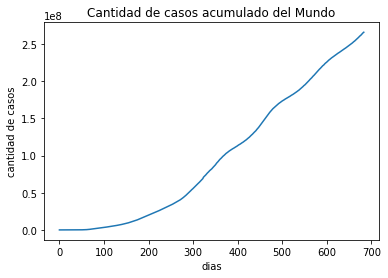

In [9]:
plt.plot(dias_world,casos_world)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Cantidad de casos acumulado del Mundo')

Text(0, 0.5, 'cantidad de casos')

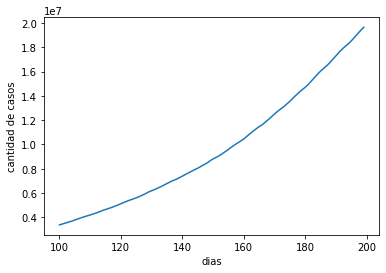

In [10]:
casos_principio = casos_world[100:200]
dias_principio = dias_world[100:200]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'log cantidad de casos')

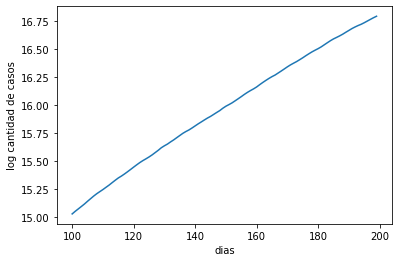

In [11]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

In [12]:
#definimos función para ajustar modelo
def exponencial(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

In [13]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio, maxfev = 2000)
popt
# print(pcov)

array([ 1.71264047e-02, -7.83182803e+02])

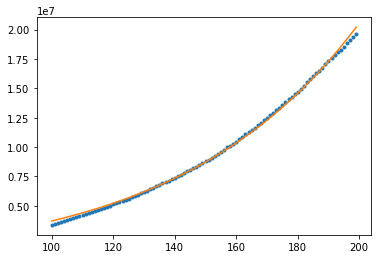

In [14]:
k_mundo = popt[0]
t0 = popt[1]
casos_simu = exponencial(dias_principio, k_mundo, t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)

In [15]:
k_mundo

0.017126404714268968

In [16]:
def casos_nuevos(casos):
  nuevos=np.zeros(len(casos))
  i=0
  while i<len(nuevos)-1:
    nuevos[i]=casos[i+1]-casos[i]
    i=i+1

  return nuevos   

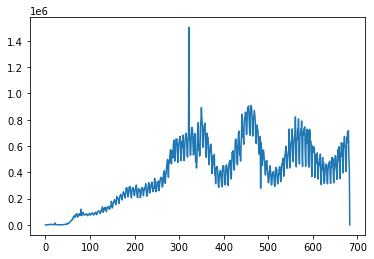

In [17]:
casos_mundo = np.array(casos_world)
nuevos_mundo = casos_nuevos(casos_mundo)
plt.plot(nuevos_mundo)

# casos_arg

### Voy viendo paises de interes que paso con los casos

In [18]:
# 1- Elegir diez países del norte (ahí empezó la pandemia) y puedes mide el valor de  𝑘  inicial de la pandemia, analizando datos del primer tramo.
# Argentina, USA, Brazil, Mexico, Italia, España, China, Japon, Suecia, Noruega

In [19]:
#seleccionamos Argentina

ind_arg=np.where(paises=='Argentina')
ind_arg=ind_arg[0]
casos_arg=confirmados[ind_arg]
dias=np.arange(0,len(casos_arg))

In [20]:
datos.loc[datos['Entity'] == 'Argentina'].head(50) #primer caso en Arg 03-03-2020

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
4515,Argentina,ARG,2020-01-01,4.0,tests performed,NaN,NaN
4516,Argentina,ARG,2020-01-02,53.0,tests performed,NaN,NaN
4517,Argentina,ARG,2020-01-03,58.0,tests performed,NaN,NaN
4518,Argentina,ARG,2020-01-04,133.0,tests performed,NaN,NaN
4519,Argentina,ARG,2020-01-05,146.0,tests performed,NaN,NaN
4520,Argentina,ARG,2020-01-06,200.0,tests performed,NaN,NaN
4521,Argentina,ARG,2020-01-07,230.0,tests performed,NaN,NaN
4522,Argentina,ARG,2020-01-08,235.0,tests performed,NaN,NaN
4523,Argentina,ARG,2020-01-09,236.0,tests performed,NaN,NaN
4524,Argentina,ARG,2020-01-10,315.0,tests performed,NaN,NaN


In [21]:
casos_arg

4515          NaN
4516          NaN
4517          NaN
4518          NaN
4519          NaN
          ...    
5198    5332629.0
5199    5335310.0
5200    5337692.0
5201    5339382.0
5202    5340676.0
Name: Total confirmed cases of COVID-19, Length: 688, dtype: float64

In [22]:
print('Cantidad de NaNs del dataset:','\n',casos_arg.isnull().sum(),'\n')


Cantidad de NaNs del dataset: 
 45 



In [23]:
# Agrego a los datos faltantes un valor relacionado a esos dias para tener el dataset completo

In [24]:
casos_argSDF = casos_arg.fillna(0.0001)
print('Cantidad de NaNs del dataset:','\n',casos_argSDF.isnull().sum(),'\n')

casos_argSDF[4515]

Cantidad de NaNs del dataset: 
 0 



0.0001

In [25]:
print(casos_argSDF.describe())

count    6.880000e+02
mean     2.104129e+06
std      1.994720e+06
min      1.000000e-04
25%      8.612900e+04
50%      1.580782e+06
75%      4.204565e+06
max      5.340676e+06
Name: Total confirmed cases of COVID-19, dtype: float64


Text(0, 0.5, 'cantidad de casos')

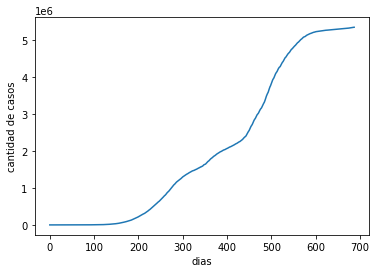

In [26]:
plt.plot(dias,casos_argSDF)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Esta es la curva de **casos totales** de la Argentina. Aquí no se ven las olas, ya que estas se ven en la curva de casos confirmados por día, es decir, de casos nuevos. Esta habla de los acumulados, entonces siempre se agregan.

Para ver mejor la curva, podemos tomar el logartimo de los datos. Una curva exponencial se ve lineal en escala logarítmica


Text(0, 0.5, 'log cantidad de casos')

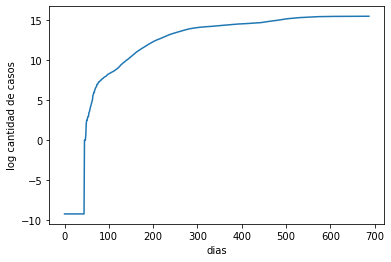

In [27]:
plt.plot(dias,np.log(casos_argSDF))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

Veamos lo que pasa en los primeros 60 días desde que se detectó el primer caso en Argentina, para ver cómo fue el $k$ inicial

Text(0, 0.5, 'cantidad de casos')

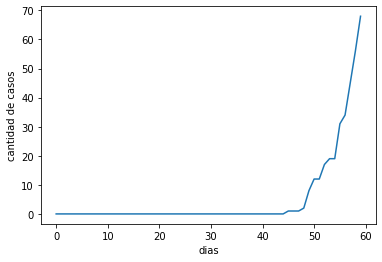

In [28]:
casos_principio = casos_argSDF[0:60]
dias_principio = dias[0:60]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')



# 100 a 220 eligio Juan viendo la curva de acumulados del mundo como periodo ventana de tiempo
# Se puede elegir el inicio de la pandemia para cada pais cuando reporto el primer caso de covid

Es difícil determinar si esta parte es exponencial. Analicemos qué pasa en escala logarítmica.

Text(0, 0.5, 'log cantidad de casos')

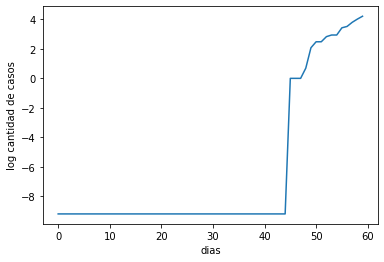

In [29]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

Mejor nos quedamos con lo que sucede entre los días .....31 y 55....., ya que ese fue el comportamiento más sostenido.

Text(0, 0.5, 'cantidad de casos')

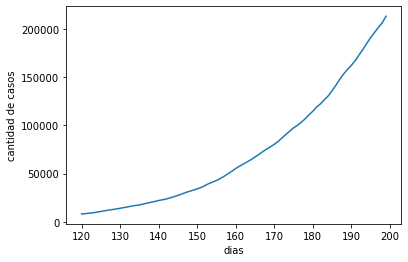

In [30]:
casos_principio = casos_argSDF[120:200]
dias_principio = dias[120:200]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'log cantidad de casos')

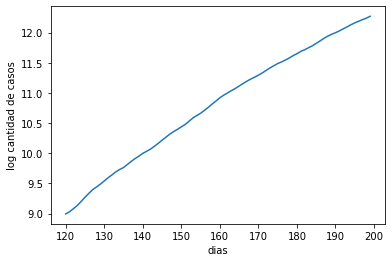

In [31]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

¡Se ve bastante lineal! Aprovechemos esto para averiguar el $k$ utilizando un ajuste hecho con el método de cuadrados mínimos, ajustando los datos al modelo 

$Confirmados=e^{k(t-t_0)}$



In [32]:
#definimos función para ajustar modelo
def exponencial(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

In [33]:
print(dias_principio)
print(casos_principio)
print(exponencial)

[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199]
4635      8068.0
4636      8371.0
4637      8809.0
4638      9283.0
4639      9931.0
          ...   
4710    191302.0
4711    196543.0
4712    201919.0
4713    206743.0
4714    213535.0
Name: Total confirmed cases of COVID-19, Length: 80, dtype: float64
<function exponencial at 0x00000236DE291D90>


In [34]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio, maxfev = 2000)
popt
# print(pcov)

array([ 3.65404719e-02, -1.38059243e+02])

Veamos cómo se ajusta lo que obtuvimos a los datos reales

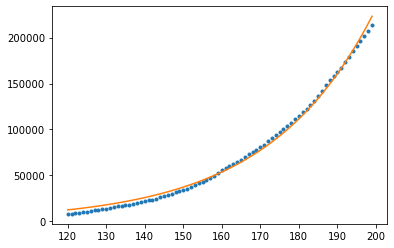

In [35]:
k_Arg = popt[0]
# print(k_Arg)
t0 = popt[1]
# print(t0)
casos_simu = exponencial(dias_principio,k_Arg,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)

In [36]:
casos_simu

array([ 12451.62608147,  12915.02929991,  13395.67866286,  13894.21600769,
        14411.30705856,  14947.64231543,  15503.93797607,  16080.93689247,
        16679.40956284,  17300.15516044,  17944.0026008 ,  18611.81164858,
        19304.47406571,  20022.91480219,  20768.09323118,  21541.00443017,
        22342.68050975,  23174.19199177,  24036.64923899,  24931.2039377 ,
        25859.05063568,  26821.42833735,  27819.62215824,  28854.96504112,
        29928.83953594,  31042.67964599,  32197.97274287,  33396.26155258,
        34639.14621567,  35928.28642396,  37265.40363682,  38652.28337997,
        40090.77762971,  41582.80728605,  43130.36473773,  44735.5165228 ,
        46400.40608818,  48127.2566519 ,  49918.37417189,  51776.15042528,
        53703.06620225,  55701.69461874,  57774.70455252,  59924.86420706,
        62155.04480806,  64468.22443758,  66867.49201081,  69356.05140086,
        71937.22571712,  74614.46174272,  77391.33453725,  80271.55221074,
        83258.96087527,  

# Calcular el intervalo de confianza para k

In [37]:
dato_k = k_Arg
dato_k

0.03654047188218885

In [38]:
z= abs(stats.norm.ppf(0.05/2))
print(z)
n=1

1.9599639845400545


In [39]:
mu_muestra=np.mean(dato_k)
sigma_muestra=np.std(dato_k)
print(mu_muestra)
print(sigma_muestra)

0.03654047188218885
0.0


In [40]:
int_conf=[mu_muestra-z*sigma_muestra/np.sqrt(n),mu_muestra+z*sigma_muestra/np.sqrt(n)]
print(int_conf)

[0.03654047188218885, 0.03654047188218885]


In [41]:
int_conf[1]-int_conf[0]

0.0

Como última pista, hagamos una función que determine los casos nuevos por día a partir de estas curvas. Puede ser útil para tu análisis.

In [42]:
def casos_nuevos(casos):
  nuevos=np.zeros(len(casos))
  i=0
  while i<len(nuevos)-1:
    nuevos[i]=casos[i+1]-casos[i]
    i=i+1

  return nuevos   

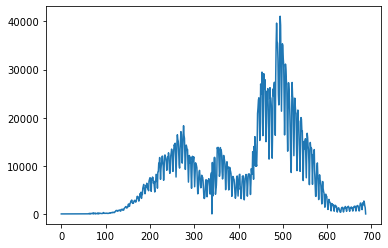

In [43]:
casos_arg_ = np.array(casos_argSDF)
nuevos_arg = casos_nuevos(casos_arg_)
plt.plot(nuevos_arg)

# casos_arg

# NORUEGA

In [44]:
#seleccionamos Noruega

ind_nor=np.where(paises=='Norway')
ind_nor=ind_nor[0]
casos_nor=confirmados[ind_nor]
dias_nor=np.arange(0,len(casos_nor))

In [45]:
casos_nor

88898    4863.0
88899    5147.0
88900    5370.0
88901    5550.0
88902    5687.0
          ...  
89542     205.0
89543     400.0
89544     598.0
89545     702.0
89546     996.0
Name: Total confirmed cases of COVID-19, Length: 649, dtype: float64

In [46]:
print('Cantidad de NaNs del dataset:','\n',casos_nor.isnull().sum(),'\n')


Cantidad de NaNs del dataset: 
 0 



In [47]:
print(casos_nor.describe())

count       649.000000
mean      76984.215716
std       72491.995741
min           1.000000
25%        9468.000000
50%       58202.000000
75%      130491.000000
max      284448.000000
Name: Total confirmed cases of COVID-19, dtype: float64


Text(0, 0.5, 'cantidad de casos')

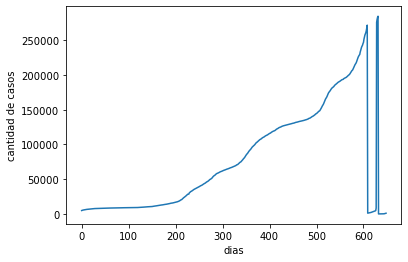

In [48]:
plt.plot(dias_nor,casos_nor)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'cantidad de casos')

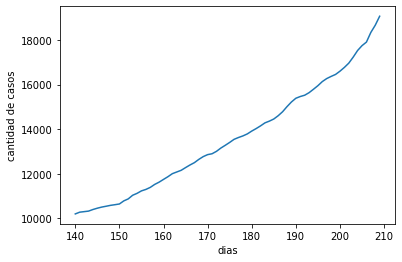

In [49]:
casos_principio = casos_nor[140:210]
dias_principio = dias_nor[140:210]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'log cantidad de casos')

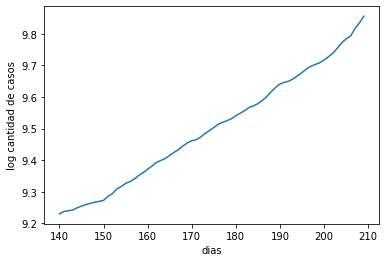

In [50]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

In [51]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio, maxfev = 1000)
popt
# pcov

array([ 8.95860765e-03, -8.86087062e+02])

Veamos cómo se ajusta lo que obtuvimos a los datos reales

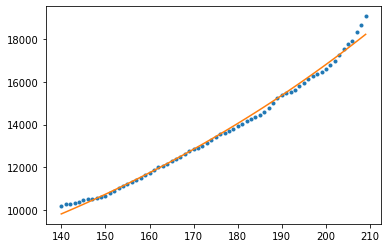

In [52]:
k_Noruega = popt[0]
t0 = popt[1]
casos_simu = exponencial(dias_principio,k_Noruega,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)

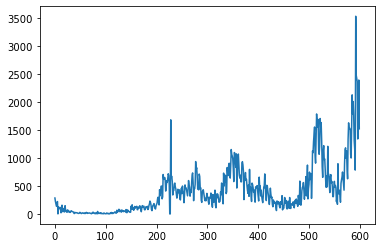

In [53]:
casos_nor = np.array(casos_nor)
nuevos_nor = casos_nuevos(casos_nor)
plt.plot(nuevos_nor[0:600])

# casos_arg

# CHINA


In [54]:
#seleccionamos China

ind_china=np.where(paises=='China')
ind_china=ind_china[0]
casos_china=confirmados[ind_china]
dias_china=np.arange(0,len(casos_china))

In [55]:
casos_china

24884    83494.0
24885    84611.0
24886      548.0
24887      641.0
24888      918.0
          ...   
25563    98974.0
25564    99070.0
25565    99160.0
25566    99219.0
25567    99280.0
Name: Total confirmed cases of COVID-19, Length: 684, dtype: float64

In [56]:
print('Cantidad de NaNs del dataset:','\n',casos_china.isnull().sum(),'\n')


Cantidad de NaNs del dataset: 
 0 



In [57]:
print(casos_china.describe())

count      684.000000
mean     86063.733918
std      13727.146417
min        548.000000
25%      83636.750000
50%      87061.000000
75%      91593.750000
max      99280.000000
Name: Total confirmed cases of COVID-19, dtype: float64


Text(0, 0.5, 'cantidad de casos')

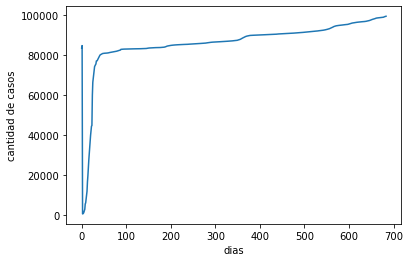

In [58]:
plt.plot(dias_china,casos_china)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'cantidad de casos')

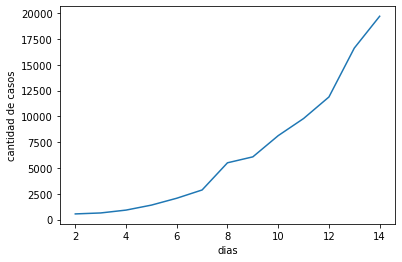

In [59]:
casos_principio = casos_china[2:15]
dias_principio = dias_china[2:15]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'log cantidad de casos')

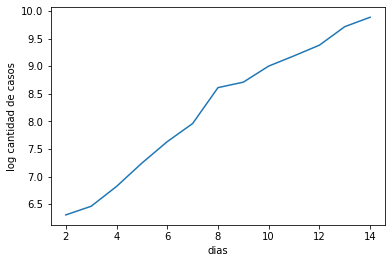

In [60]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

In [61]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio, maxfev = 2000)
popt
# pcov

array([  0.25262598, -25.27566715])

0.2526259822050848


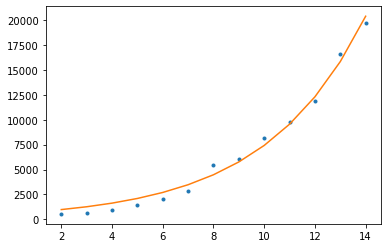

In [62]:
k_China = popt[0]
print(k_China)
t0 = popt[1]
casos_simu = exponencial(dias_principio,k_China,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)

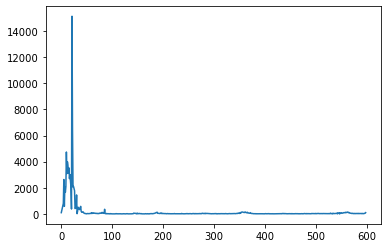

In [63]:
casos_china = np.array(casos_china)
nuevos_china = casos_nuevos(casos_china)
plt.plot(nuevos_china[2:600])

# casos_arg

# JAPON


In [64]:
#seleccionamos Japon

ind_Japon=np.where(paises=='Japan')
ind_Japon=ind_Japon[0]
casos_Japon=confirmados[ind_Japon]
dias_Japon=np.arange(0,len(casos_Japon))

In [65]:
casos_Japon

60372    23.0
60373    23.0
60374    23.0
60375    24.0
60376    24.0
         ... 
61051    15.0
61052    20.0
61053    20.0
61054    20.0
61055    22.0
Name: Total confirmed cases of COVID-19, Length: 684, dtype: float64

In [66]:
print('Cantidad de NaNs del dataset:','\n',casos_Japon.isnull().sum(),'\n')


Cantidad de NaNs del dataset: 
 0 



In [67]:
print(casos_Japon.describe())

count    6.840000e+02
mean     4.973830e+05
std      5.828470e+05
min      2.000000e+00
25%      2.132350e+04
50%      2.255325e+05
75%      7.809630e+05
max      1.727229e+06
Name: Total confirmed cases of COVID-19, dtype: float64


Text(0, 0.5, 'cantidad de casos')

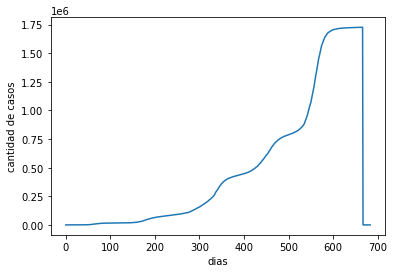

In [68]:
plt.plot(dias_Japon,casos_Japon)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'cantidad de casos')

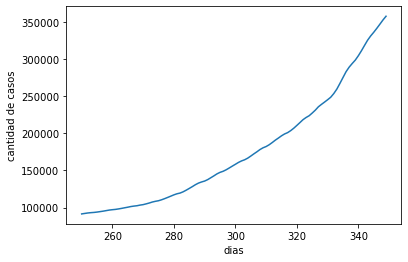

In [69]:
casos_principio = casos_Japon[250:350]
dias_principio = dias_Japon[250:350]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'log cantidad de casos')

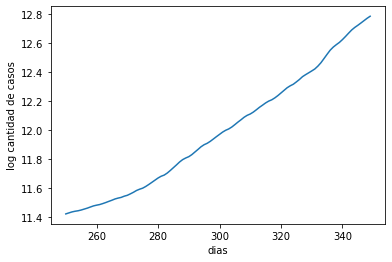

In [70]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

In [71]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio, maxfev = 2000)
popt
# pcov

array([ 1.54660196e-02, -4.75194928e+02])

Veamos cómo se ajusta lo que obtuvimos a los datos reales

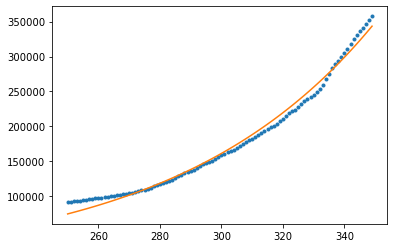

In [72]:
k_Japon = popt[0]
t0 = popt[1]
casos_simu = exponencial(dias_principio,k_Japon,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)

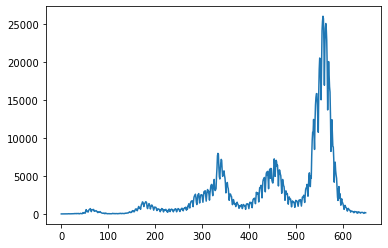

In [73]:
casos_Japon = np.array(casos_Japon)
nuevos_Japon = casos_nuevos(casos_Japon)
plt.plot(nuevos_Japon[0:650])

# casos_arg

# SUECIA


In [74]:
#seleccionamos Suecia

ind_Suecia=np.where(paises=='Sweden')
ind_Suecia=ind_Suecia[0]
casos_Suecia=confirmados[ind_Suecia]
dias_Suecia=np.arange(0,len(casos_Suecia))

In [75]:
casos_Suecia

115164    424.0
115165    620.0
115166    771.0
115167    923.0
115168    994.0
          ...  
115833     87.0
115834    146.0
115835    179.0
115836    225.0
115837    326.0
Name: Total confirmed cases of COVID-19, Length: 674, dtype: float64

In [76]:
print('Cantidad de NaNs del dataset:','\n',casos_Suecia.isnull().sum(),'\n')


Cantidad de NaNs del dataset: 
 0 



In [77]:
print(casos_Suecia.describe())

count    6.740000e+02
mean     5.298359e+05
std      4.722274e+05
min      1.000000e+00
25%      7.446250e+04
50%      4.373790e+05
75%      1.084636e+06
max      1.212145e+06
Name: Total confirmed cases of COVID-19, dtype: float64


In [78]:
datos.loc[datos['Entity'] == 'Sweden'].head(300)

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
115164,Sweden,SWE,2020-03-10,NaN,NaN,1.0,424.0
115165,Sweden,SWE,2020-03-11,NaN,NaN,1.0,620.0
115166,Sweden,SWE,2020-03-12,NaN,NaN,2.0,771.0
115167,Sweden,SWE,2020-03-13,NaN,NaN,3.0,923.0
115168,Sweden,SWE,2020-03-14,NaN,NaN,5.0,994.0
...,...,...,...,...,...,...,...
115459,Sweden,SWE,2020-12-30,NaN,NaN,8727.0,437379.0
115460,Sweden,SWE,2020-12-31,NaN,NaN,8727.0,437379.0
115461,Sweden,SWE,2021-01-01,NaN,NaN,8727.0,437379.0
115462,Sweden,SWE,2021-01-02,NaN,NaN,8727.0,437379.0


Text(0, 0.5, 'cantidad de casos')

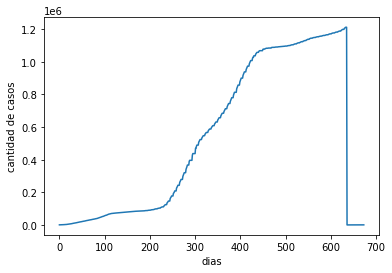

In [79]:
plt.plot(dias_Suecia,casos_Suecia)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'cantidad de casos')

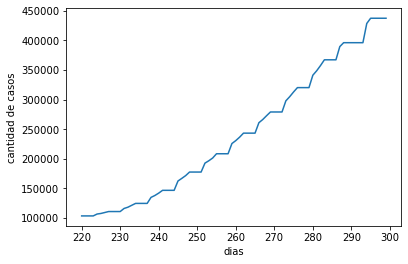

In [80]:
casos_principio = casos_Suecia[220:300]
dias_principio = dias_Suecia[220:300]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'log cantidad de casos')

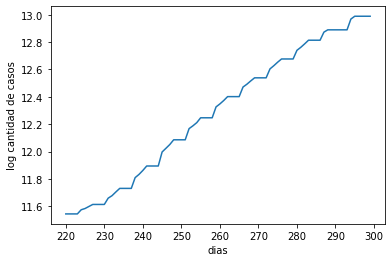

In [81]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

In [82]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio, maxfev = 2000)
popt
# pcov

array([ 1.94366124e-02, -3.73294170e+02])

Veamos cómo se ajusta lo que obtuvimos a los datos reales

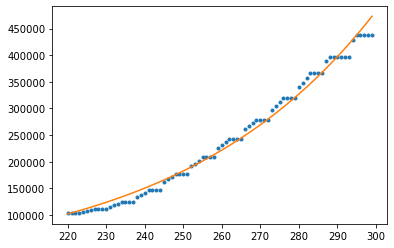

In [83]:
k_Suecia = popt[0]
t0 = popt[1]
casos_simu = exponencial(dias_principio,k_Suecia,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)

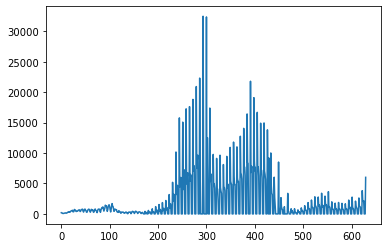

In [84]:
casos_Suecia = np.array(casos_Suecia)
nuevos_Suecia = casos_nuevos(casos_Suecia)
plt.plot(nuevos_Suecia[0:630])

# casos_arg

# ESPAÑA


In [85]:
#seleccionamos España

ind_España=np.where(paises=='Spain')
ind_España=ind_España[0]
casos_España=confirmados[ind_España]
dias_España=np.arange(0,len(casos_España))

In [86]:
datos.loc[datos['Entity'] == 'Spain'].head(100)

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
112375,Spain,ESP,2020-04-13,930230.0,tests performed,17756.0,170099.0
112376,Spain,ESP,2020-04-23,1035522.0,tests performed,22157.0,213024.0
112377,Spain,ESP,2020-04-30,1351130.0,tests performed,24543.0,213435.0
112378,Spain,ESP,2020-05-07,1625211.0,tests performed,26070.0,221447.0
112379,Spain,ESP,2020-05-14,1919411.0,tests performed,27321.0,229540.0
...,...,...,...,...,...,...,...
112470,Spain,ESP,2020-03-13,NaN,NaN,133.0,5232.0
112471,Spain,ESP,2020-03-14,NaN,NaN,195.0,6391.0
112472,Spain,ESP,2020-03-15,NaN,NaN,289.0,7798.0
112473,Spain,ESP,2020-03-16,NaN,NaN,342.0,9942.0


In [87]:
casos_España

112375    170099.0
112376    213024.0
112377    213435.0
112378    221447.0
112379    229540.0
            ...   
113044        15.0
113045        32.0
113046        45.0
113047        84.0
113048       120.0
Name: Total confirmed cases of COVID-19, Length: 674, dtype: float64

In [88]:
print('Cantidad de NaNs del dataset:','\n',casos_España.isnull().sum(),'\n')


Cantidad de NaNs del dataset: 
 0 



In [89]:
print(casos_España.describe())

count    6.740000e+02
mean     2.257793e+06
std      1.850666e+06
min      1.000000e+00
25%      2.602550e+05
50%      1.928265e+06
75%      3.757442e+06
max      5.202958e+06
Name: Total confirmed cases of COVID-19, dtype: float64


Text(0, 0.5, 'cantidad de casos')

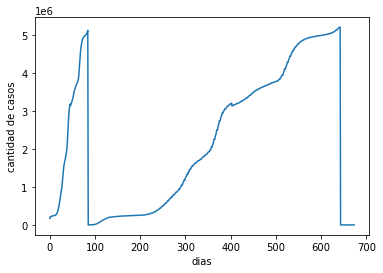

In [90]:
plt.plot(dias_España,casos_España)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'cantidad de casos')

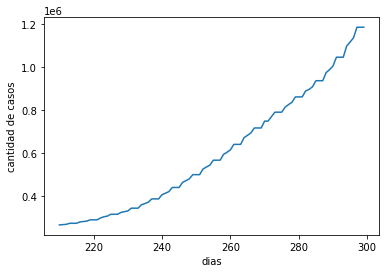

In [91]:
casos_principio = casos_España[210:300]
dias_principio = dias_España[210:300]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'log cantidad de casos')

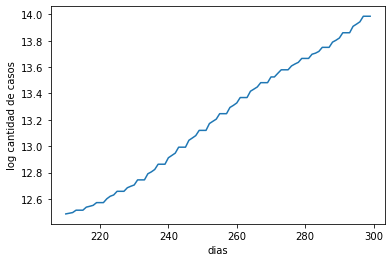

In [92]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

In [93]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio, maxfev = 2000)
popt
# pcov

array([ 1.78591421e-02, -4.84973607e+02])

Veamos cómo se ajusta lo que obtuvimos a los datos reales

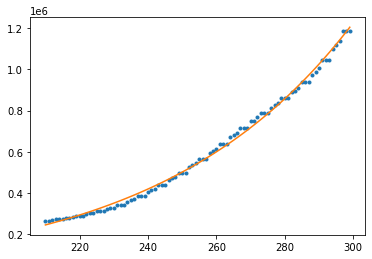

In [94]:
k_España = popt[0]
t0 = popt[1]
casos_simu = exponencial(dias_principio,k_España,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)

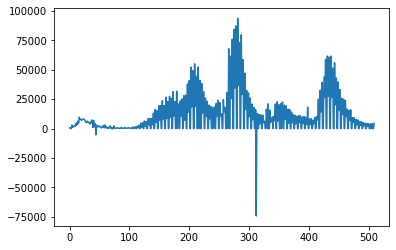

In [95]:
casos_España = np.array(casos_España)
nuevos_España = casos_nuevos(casos_España)
plt.plot(nuevos_España[90:600])

# casos_arg

# Calcular el intervalo de confianza para k todos los paises seleccionados


In [96]:
datos_k = (k_Arg, k_China, k_Suecia, k_Noruega, k_Japon, k_España)
datos_k

(0.03654047188218885,
 0.2526259822050848,
 0.019436612416638258,
 0.008958607652089964,
 0.015466019642769512,
 0.017859142080667696)

In [97]:
z= abs(stats.norm.ppf(0.05/2))
print(z)
n=len(datos_k)
n

1.9599639845400545


6

In [98]:
mu_muestra=np.mean(datos_k)
sigma_muestra=np.std(datos_k)
print(mu_muestra)
print(sigma_muestra)

0.05848113931323984
0.08722673167379766


In [99]:
int_conf=[mu_muestra-z*sigma_muestra/np.sqrt(n),mu_muestra+z*sigma_muestra/np.sqrt(n)]
print(int_conf)

[-0.011313499783934644, 0.12827577841041432]


In [100]:
int_conf[1]-int_conf[0]

0.13958927819434896

# Bootstrap

In [101]:
def remuestreo(datos):
  remuestra=np.zeros(len(datos)) #crea un vector con ceros
  i=0 #inicializo un contador para que se detenga con el while
  while i<len(datos):
    remuestra[i]=datos[np.random.randint(len(datos))] #genero numeros aleatorios enteros y los mete en remuestra. Como esta entre [] es un indice
    i=i+1 # le sumo uno al iniciador

  return remuestra  

5


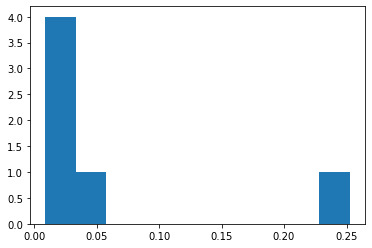

In [102]:
datos_rem=remuestreo(datos_k) #estas muestras pueden ser repetidas, ya que no se le puso una limitante de que no repita
datos_unicos=np.unique(datos_rem) #observo los numeros que me genero el remuestreo
plt.hist(datos_rem)
print(len(datos_unicos))

In [103]:
mu_muestra=np.mean(datos_k)
print(mu_muestra)

0.05848113931323984


In [104]:
mu_remuestra=np.mean(datos_rem)
print(mu_remuestra)

0.05739657064812658


In [105]:
mu_muestra=np.mean(datos_rem)
sigma_muestra=np.std(datos_rem)
print(mu_muestra)
print(sigma_muestra)


n=len(datos_rem)
int_conf=[mu_muestra-z*sigma_muestra/np.sqrt(n),mu_muestra+z*sigma_muestra/np.sqrt(n)]
print(int_conf)
print(int_conf[1]-int_conf[0])

0.05739657064812658
0.08779345001924005
[-0.012851529236021085, 0.12764467053227424]
0.14049619976829533


Hicimos un for para ver de manera silmultanea varios paises

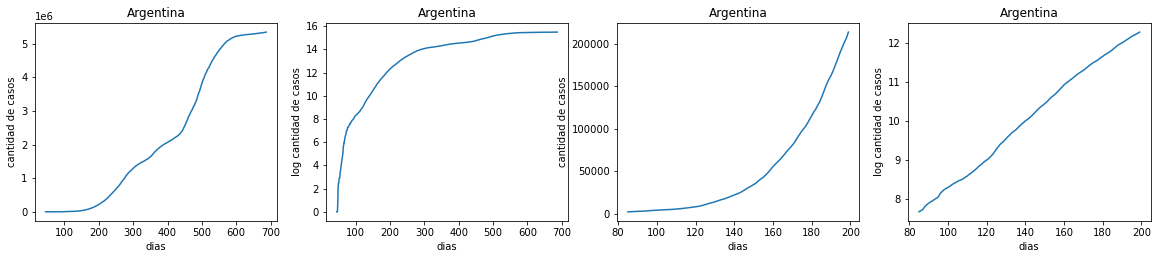

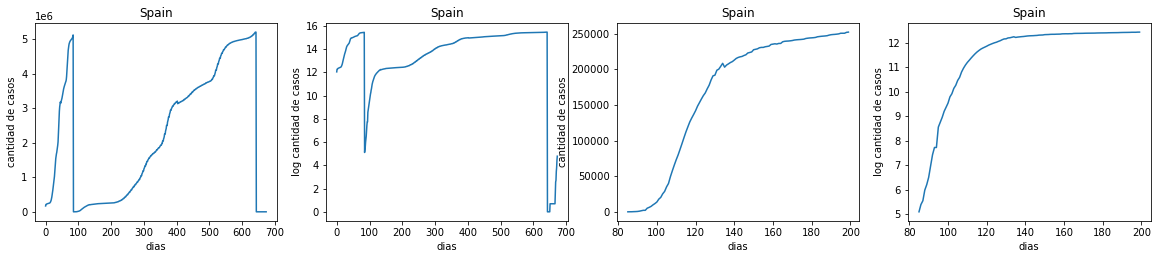

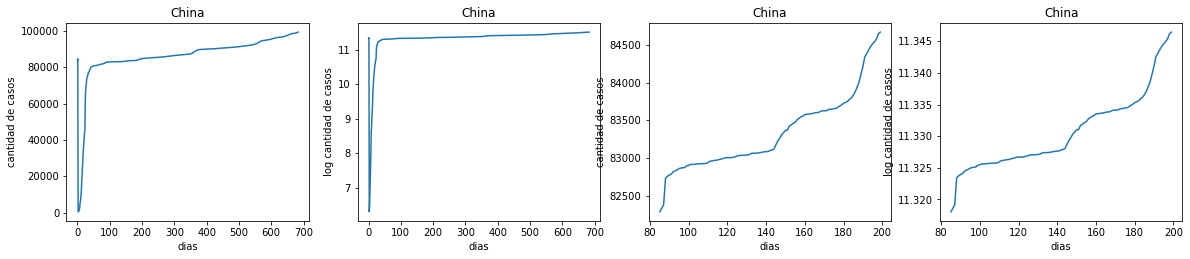

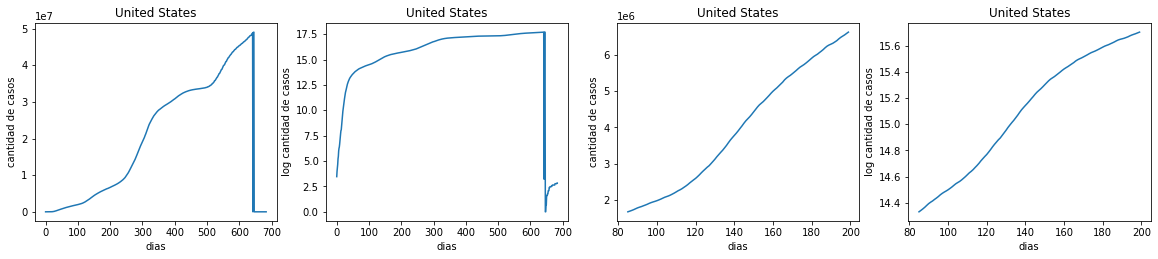

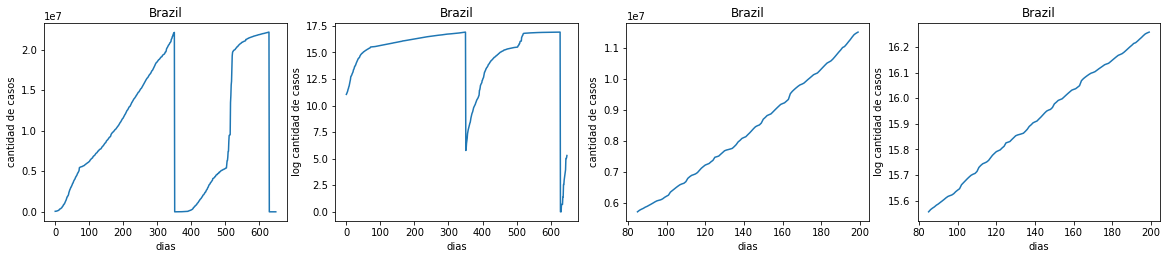

In [106]:
pais = ['Argentina', 'Spain', 'China', 'United States', 'Brazil']
dia_inicio = 85
dia_fin = 200


for i in pais:
    ind=np.where(paises==i)
    ind=ind[0]
    casos=confirmados[ind]
    dias=np.arange(0,len(casos))
    casos_principio = casos[dia_inicio:dia_fin]
    dias_principio = dias[dia_inicio:dia_fin]

    plt.figure(figsize = (20,8))
    plt.subplot(2,4,1)
    plt.plot(dias,casos)
    plt.title(i)
    plt.xlabel('dias')
    plt.ylabel('cantidad de casos')

    plt.subplot(2,4,2)
    plt.plot(dias,np.log(casos))
    plt.title(i)
    plt.xlabel('dias')
    plt.ylabel('log cantidad de casos')

    plt.subplot(2,4,3)
    plt.plot(dias_principio,casos_principio)
    plt.title(i)
    plt.xlabel('dias')
    plt.ylabel('cantidad de casos')

    plt.subplot(2,4,4)
    plt.plot(dias_principio,np.log(casos_principio))
    plt.title(i)
    plt.xlabel('dias')
    plt.ylabel('log cantidad de casos')

## Hago lo mismo pero para cantidad de muertos por COVID

In [107]:
muertes = datos['Total confirmed deaths due to COVID-19'] #carga vector todos las muertes

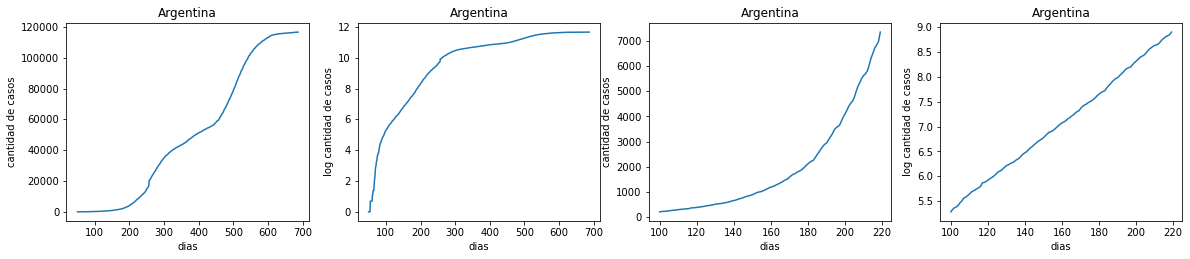

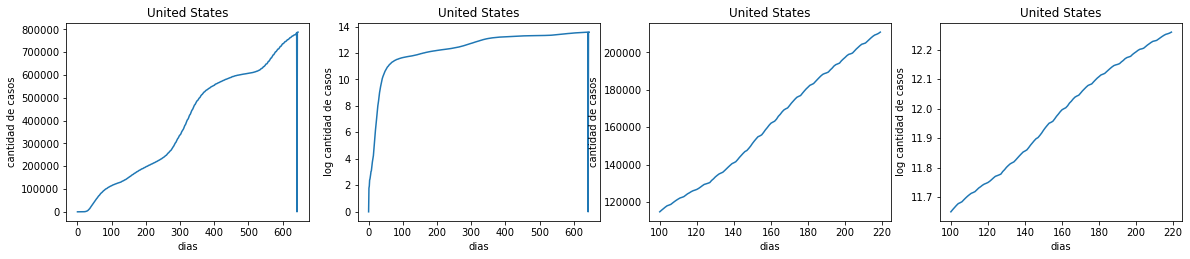

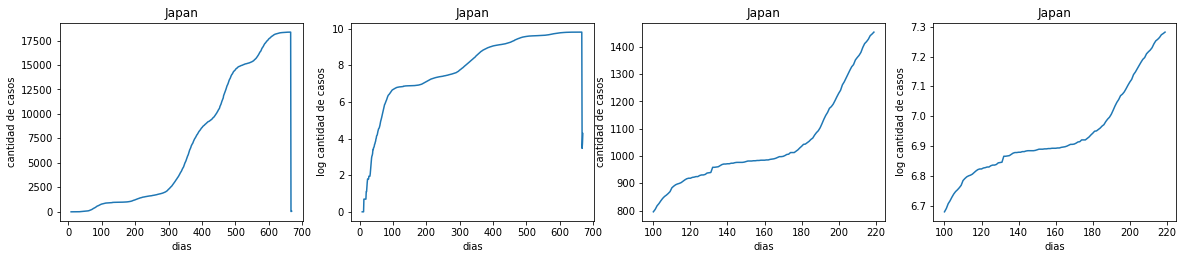

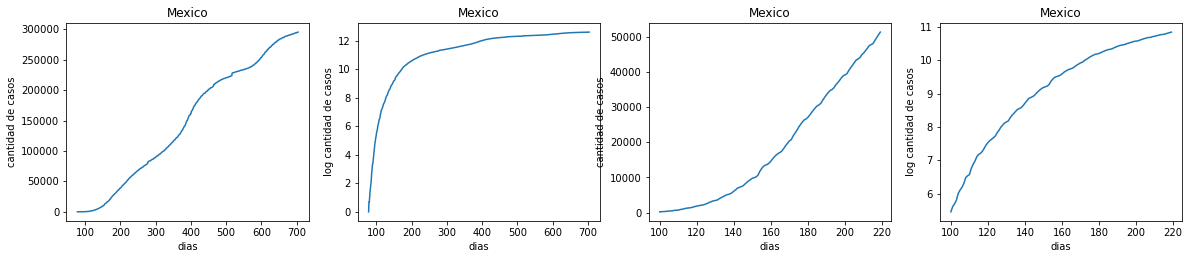

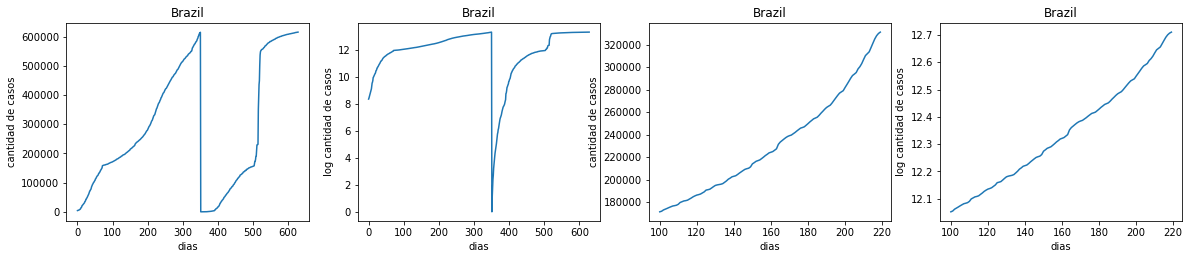

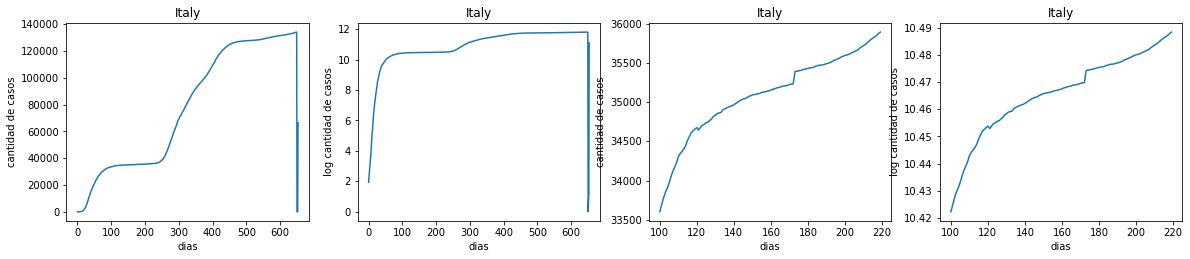

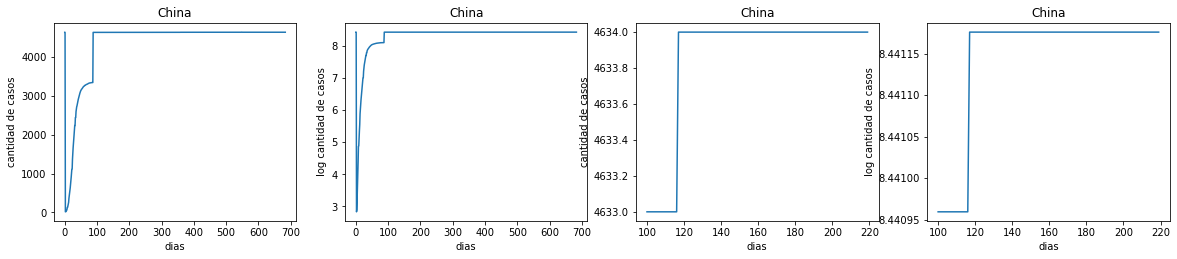

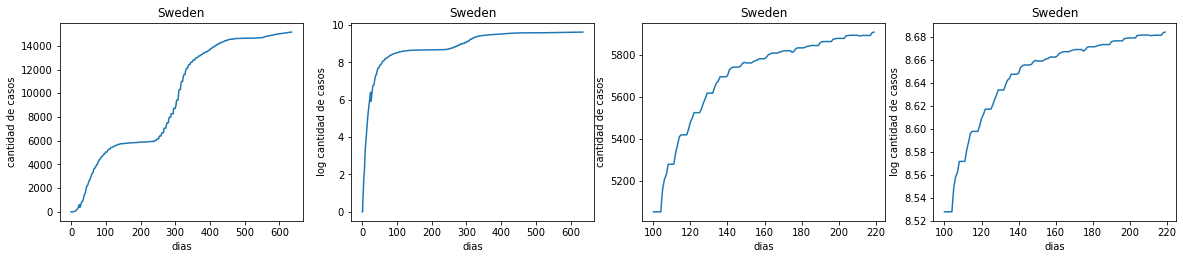

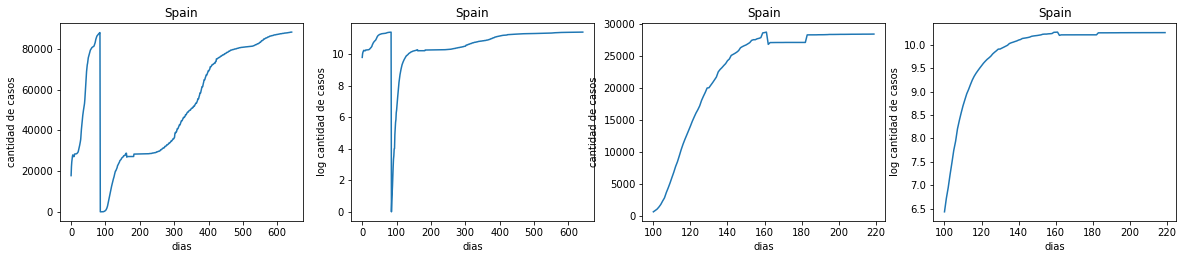

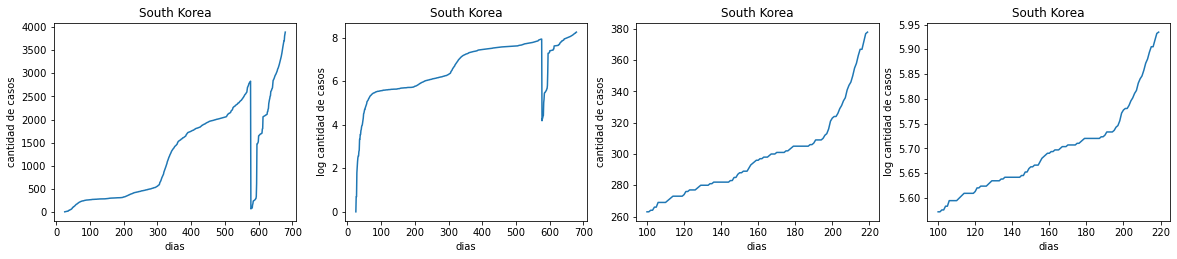

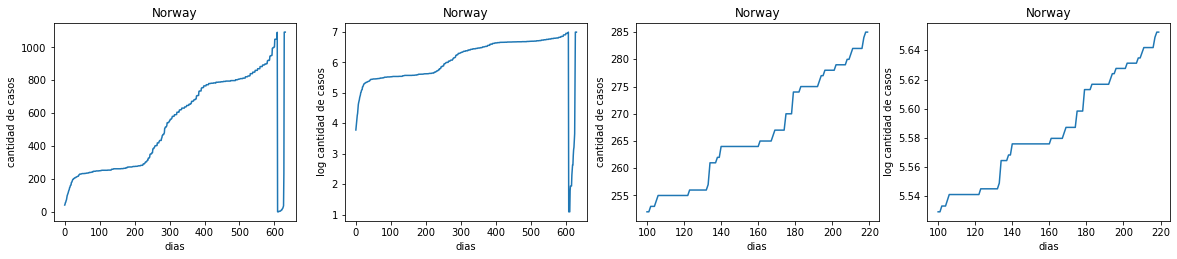

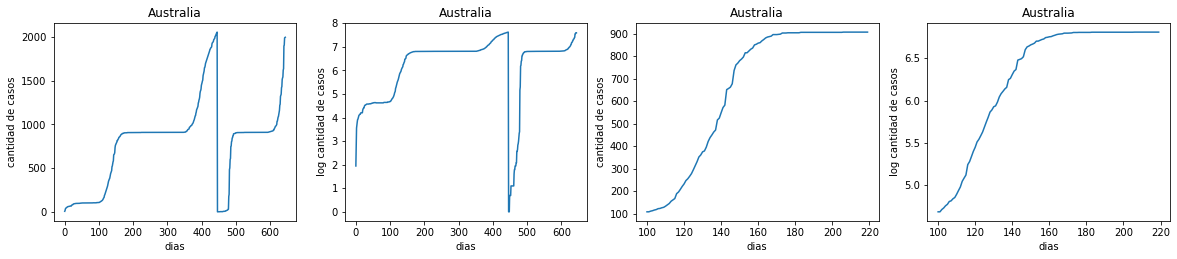

In [108]:
pais = ['Argentina', 'United States','Japan','Mexico', 'Brazil', 'Italy', 'China', 'Sweden', 'Spain', 'South Korea', 'Norway', 'Australia']
dia_inicio = 100
dia_fin = 220


for i in pais:
    ind=np.where(paises==i)
    ind=ind[0]
    casos=muertes[ind]
    dias=np.arange(0,len(casos))
    casos_principio = casos[dia_inicio:dia_fin]
    dias_principio = dias[dia_inicio:dia_fin]

    plt.figure(figsize = (20,8))
    plt.subplot(2,4,1)
    plt.plot(dias,casos)
    plt.title(i)
    plt.xlabel('dias')
    plt.ylabel('cantidad de casos')

    plt.subplot(2,4,2)
    plt.plot(dias,np.log(casos))
    plt.title(i)
    plt.xlabel('dias')
    plt.ylabel('log cantidad de casos')

    plt.subplot(2,4,3)
    plt.plot(dias_principio,casos_principio)
    plt.title(i)
    plt.xlabel('dias')
    plt.ylabel('cantidad de casos')

    plt.subplot(2,4,4)
    plt.plot(dias_principio,np.log(casos_principio))
    plt.title(i)
    plt.xlabel('dias')
    plt.ylabel('log cantidad de casos')

1- Habria un for/funcion para calculo del valor k

2- Habria un for/funcion para de casos nuevos - ver si conviene

In [109]:
def casos_covid(pais,dia_inicio, dia_fin):
    ind=np.where(paises==pais)
    ind=ind[0]
    casos=confirmados[ind]
    dias=np.arange(0,len(casos))
    casos_principio = casos[dia_inicio:dia_fin]
    dias_principio = dias[dia_inicio:dia_fin]

    plt.figure(figsize = (20,8))
    plt.subplot(2,4,1)
    plt.plot(dias,casos)
    plt.title(pais)
    plt.xlabel('dias')
    plt.ylabel('cantidad de casos')

    plt.subplot(2,4,2)
    plt.plot(dias,np.log(casos))
    plt.title(pais)
    plt.xlabel('dias')
    plt.ylabel('log cantidad de casos')

    plt.subplot(2,4,3)
    plt.plot(dias_principio,casos_principio)
    plt.title(pais)
    plt.xlabel('dias')
    plt.ylabel('cantidad de casos')

    plt.subplot(2,4,4)
    plt.plot(dias_principio,np.log(casos_principio))
    plt.title(pais)
    plt.xlabel('dias')
    plt.ylabel('log cantidad de casos')

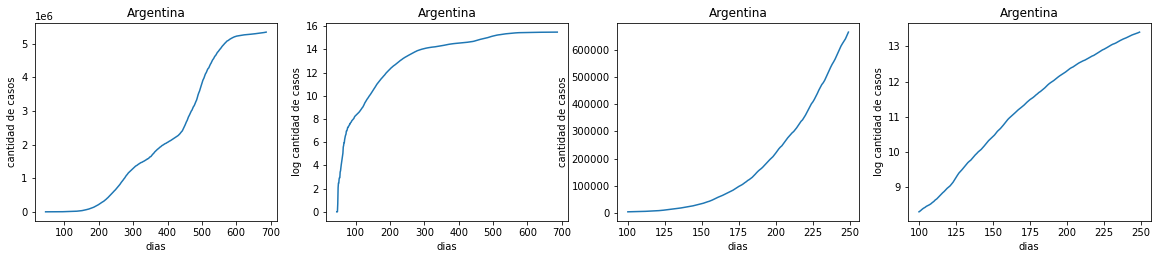

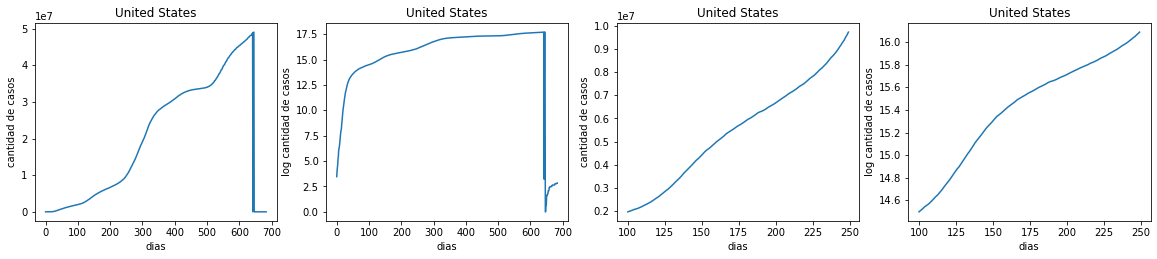

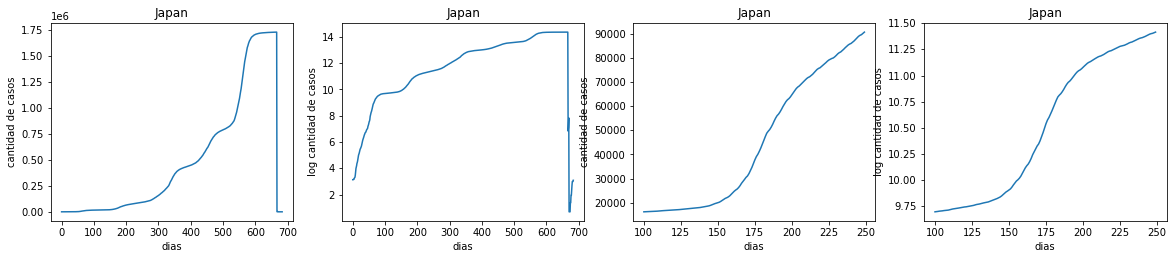

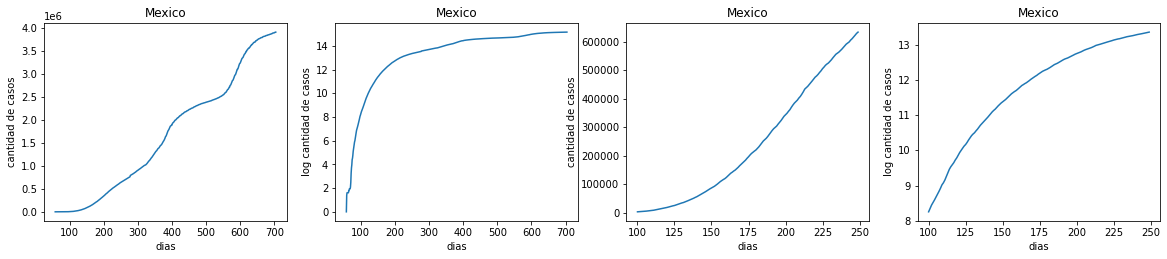

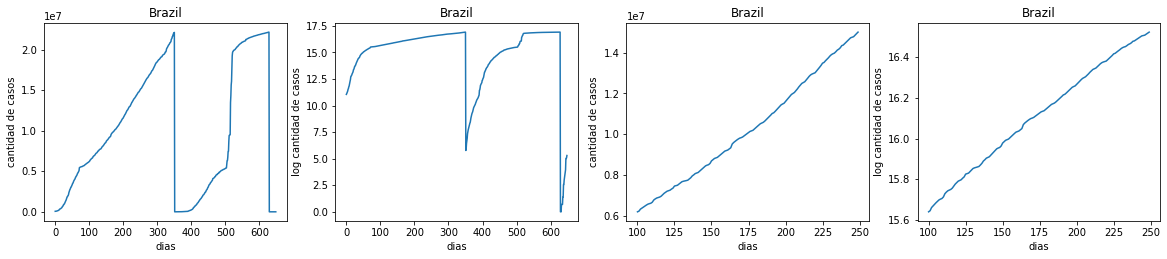

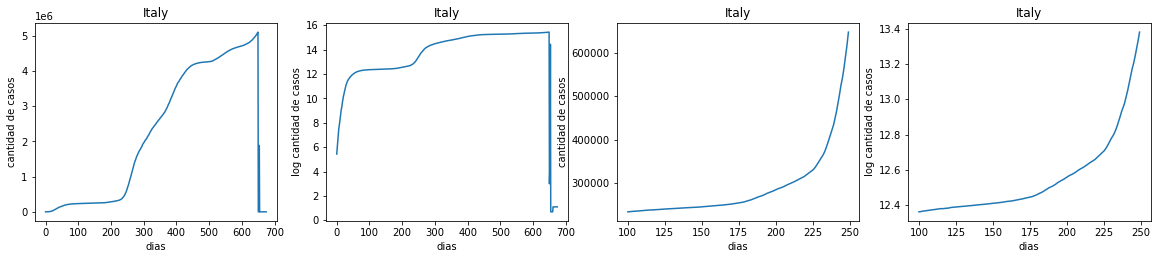

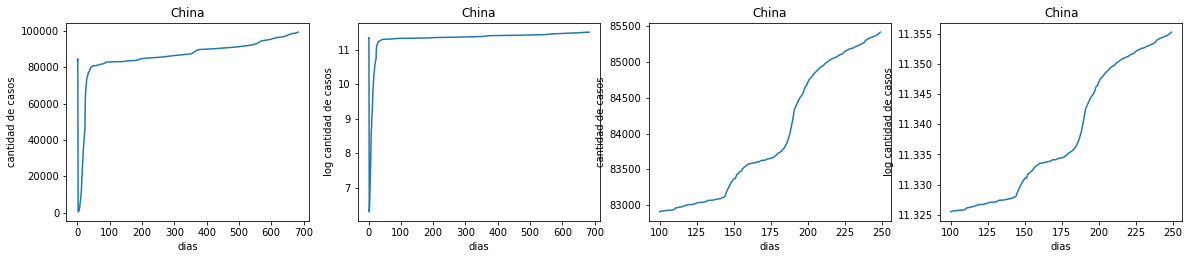

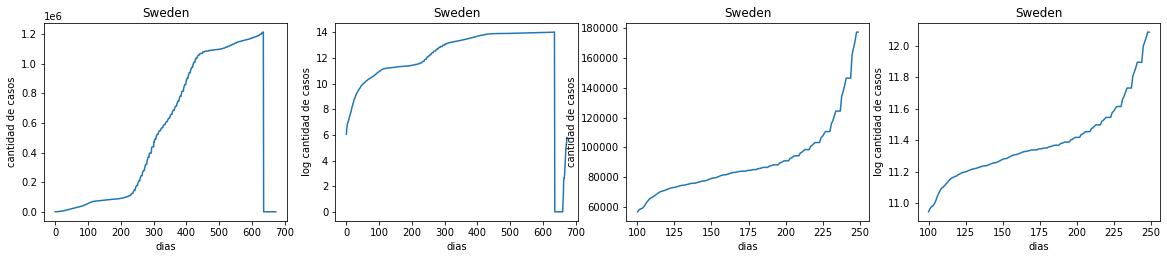

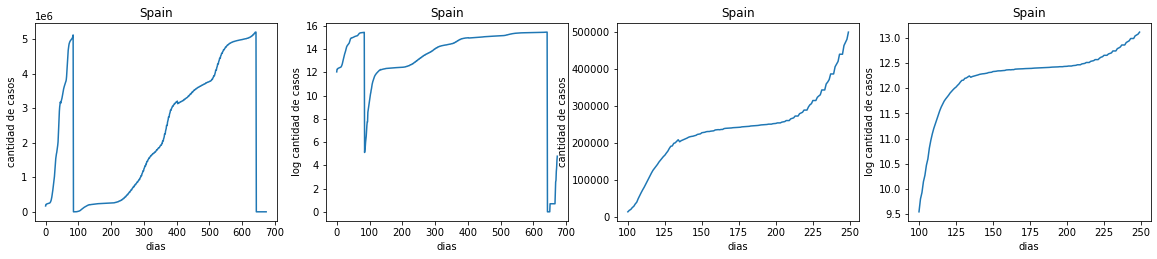

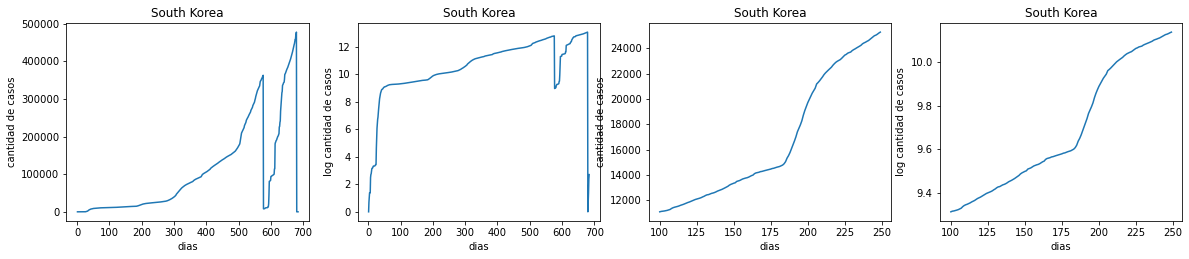

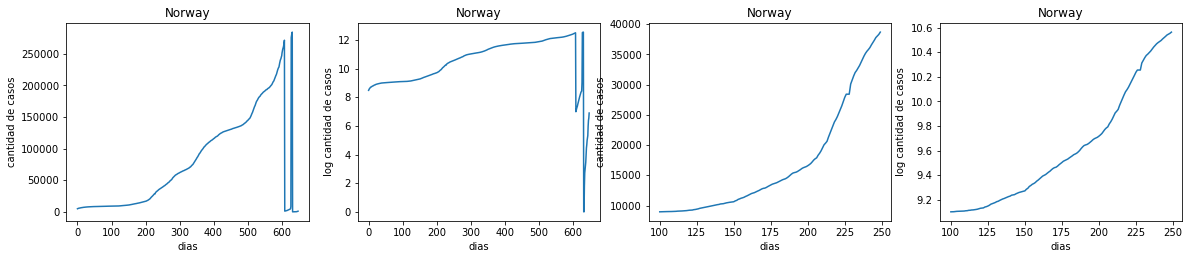

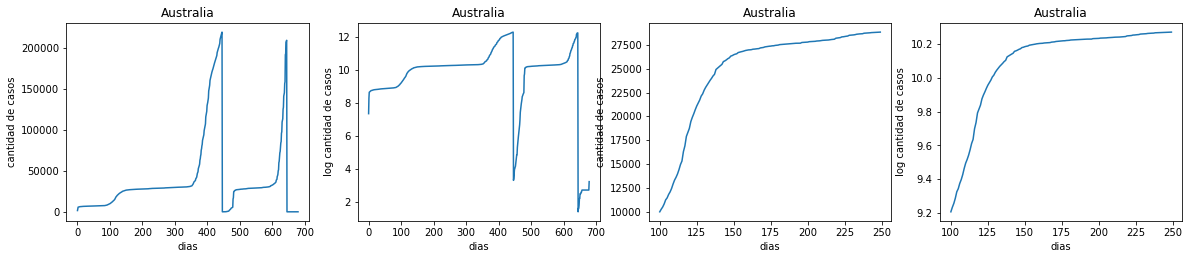

In [110]:
pais = ['Argentina', 'United States','Japan','Mexico', 'Brazil', 'Italy', 'China', 'Sweden', 'Spain', 'South Korea', 'Norway', 'Australia']

for i in pais:
    casos_covid(i,100 , 220) #definido en funcion de lo que se vio en el mundo

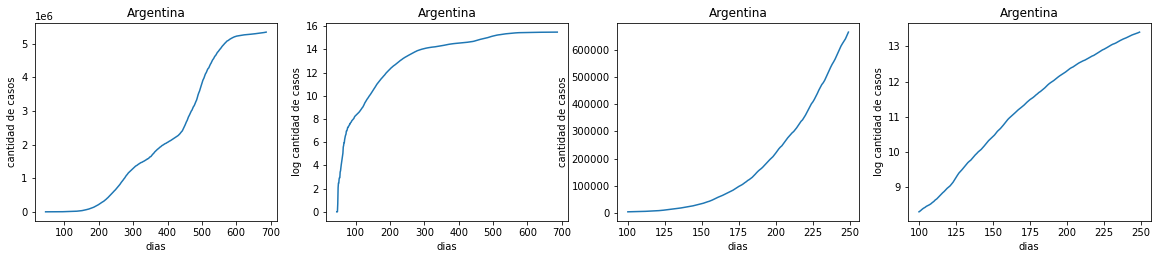

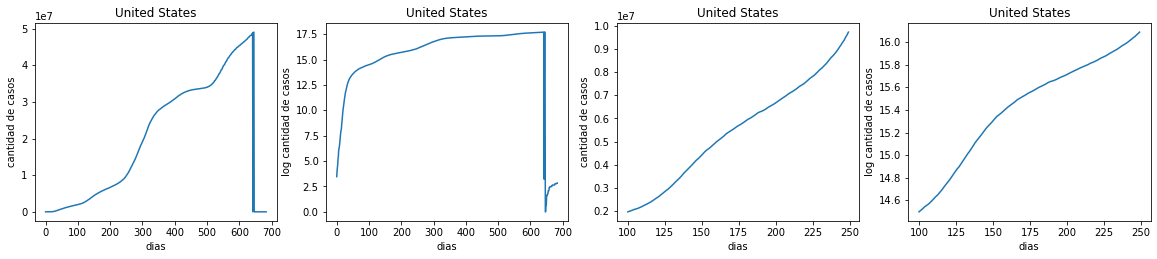

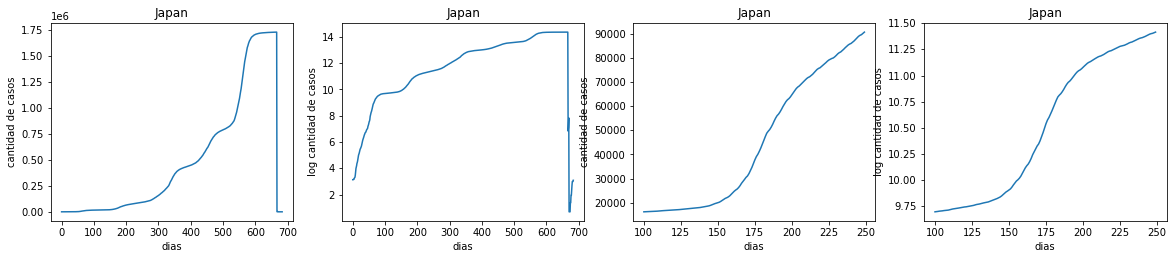

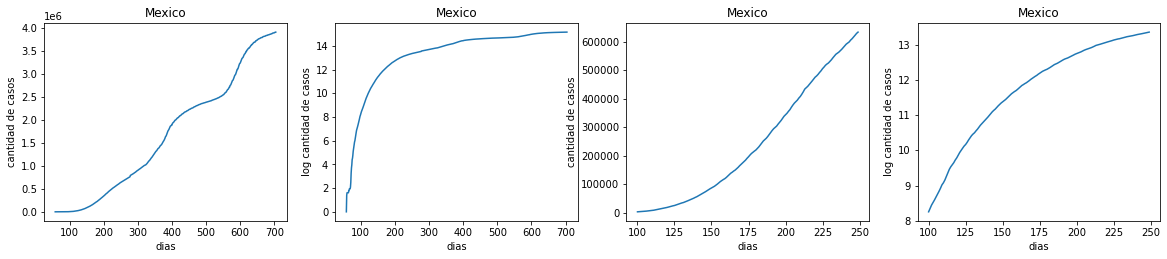

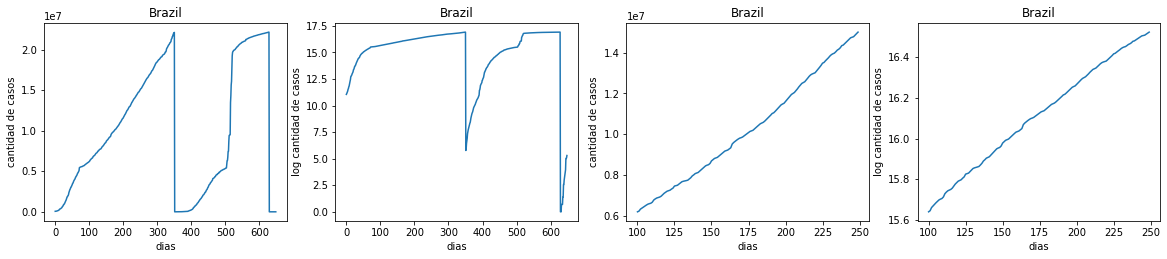

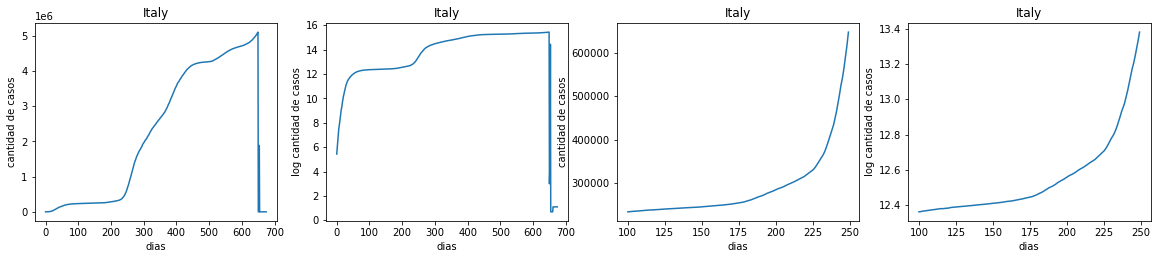

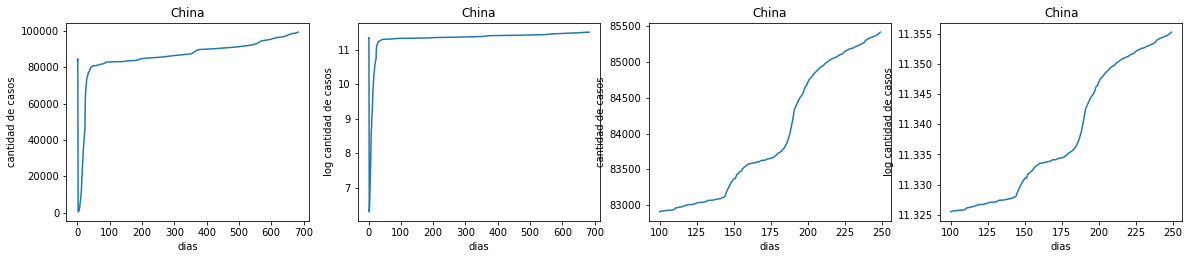

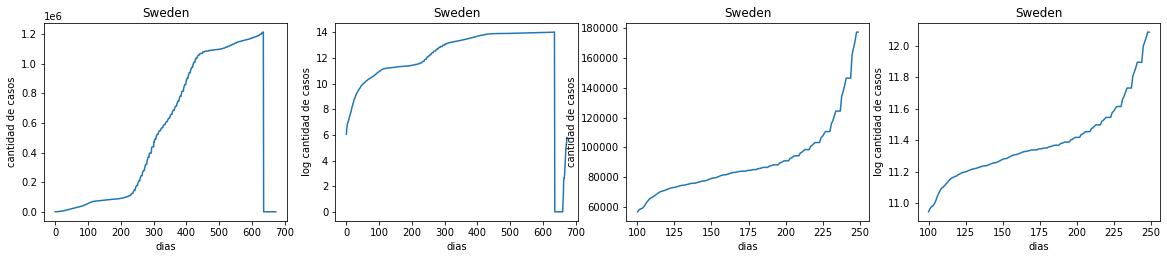

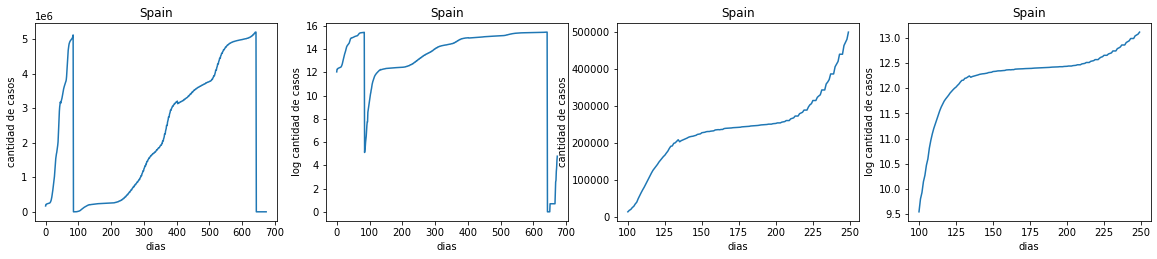

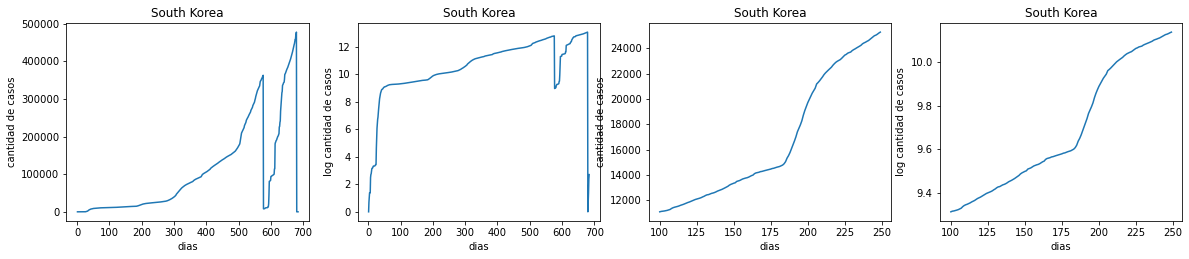

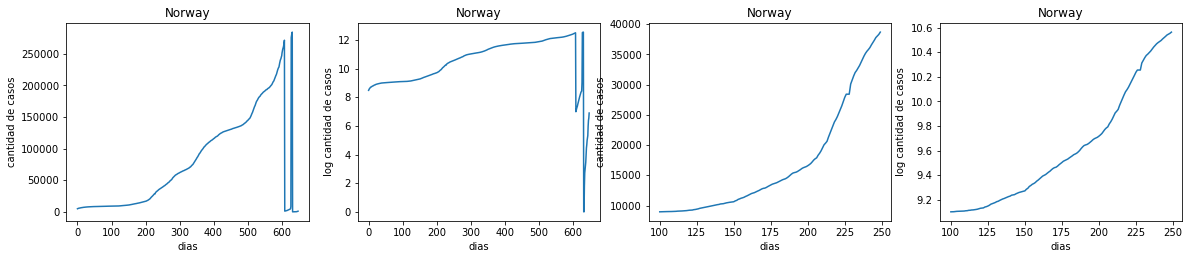

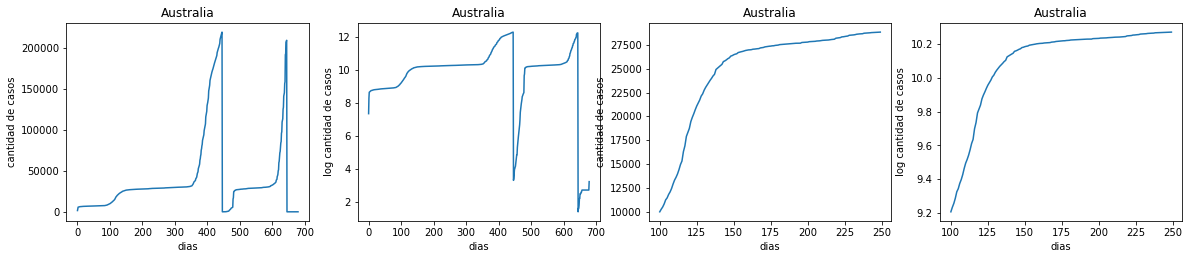

In [110]:
pais = ['Argentina', 'United States','Japan','Mexico', 'Brazil', 'Italy', 'China', 'Sweden', 'Spain', 'South Korea', 'Norway', 'Australia']

for i in pais:
    casos_covid(i, 20 , 80) #veo esta otra ventana de tiempo para observar el crecimiento de estos paises

Hacer el calculo del k para los dos periodos de tiempo

In [111]:
#definimos función para ajustar modelo
def exponencial(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

Valor de k para Afghanistan : 0.001663874892843281
Valor de k para Africa : 0.00865336175509956
Valor de k para Albania : 0.014935240268953374
Valor de k para Algeria : 0.008035118924439814
Valor de k para Andorra : 0.007766344903320981
Valor de k para Angola : 0.019235394607210896
Valor de k para Antigua and Barbuda : 0.004373452001960415
Valor de k para Argentina : 0.02560031797110564
Valor de k para Armenia : 0.002697340280609236
Valor de k para Asia : 0.017148877447126794
Valor de k para Asia excl. China : 0.01632449527597046
Valor de k para Australia : 0.003446790084396268
Valor de k para Austria : 0.028821553716164742
Valor de k para Azerbaijan : 1.1127881227795307e-07
Valor de k para Bahamas : 0.022841722981620037
Valor de k para Bahrain : 0.006259312155507212
Valor de k para Bangladesh : 0.00722560138073104
Valor de k para Barbados : 0.006092349093996604
Valor de k para Belarus : 1.1784981738609038e-06
Valor de k para Belgium : 0.025118694866076017
Valor de k para Belize : 0.02

C:\Users\paolo\miniconda3\envs\datascience\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Valor de k para Monaco : 0.015788723392601418
Valor de k para Mongolia : 0.032116677347386414
Valor de k para Montenegro : 0.020933352100428865
Valor de k para Morocco : 0.021990773899760757
Valor de k para Mozambique : 0.014510280317648191
Valor de k para Myanmar : 0.02475679147475493
Valor de k para Namibia : 0.008985940124304257
Valor de k para Nepal : 0.024559563989164448
Valor de k para Netherlands : 0.012893526462177674
Valor de k para New Zealand : 0.002118403844973867
Valor de k para Nicaragua : 0.0041120853023567504
Valor de k para Niger : 0.0013344434176720112
Valor de k para Nigeria : 0.011690478536156347
Valor de k para North America : 0.008975064286186916
Valor de k para North Macedonia : 0.01738378620516733
Valor de k para Norway : 0.012920401097699876
Valor de k para Oceania : 0.007222879629488008
Valor de k para Oman : 0.00442269900095467
Valor de k para Pakistan : 0.002985173930838891
Valor de k para Palau : 1.452442526046903e-08
Valor de k para Palestine : 0.014151939

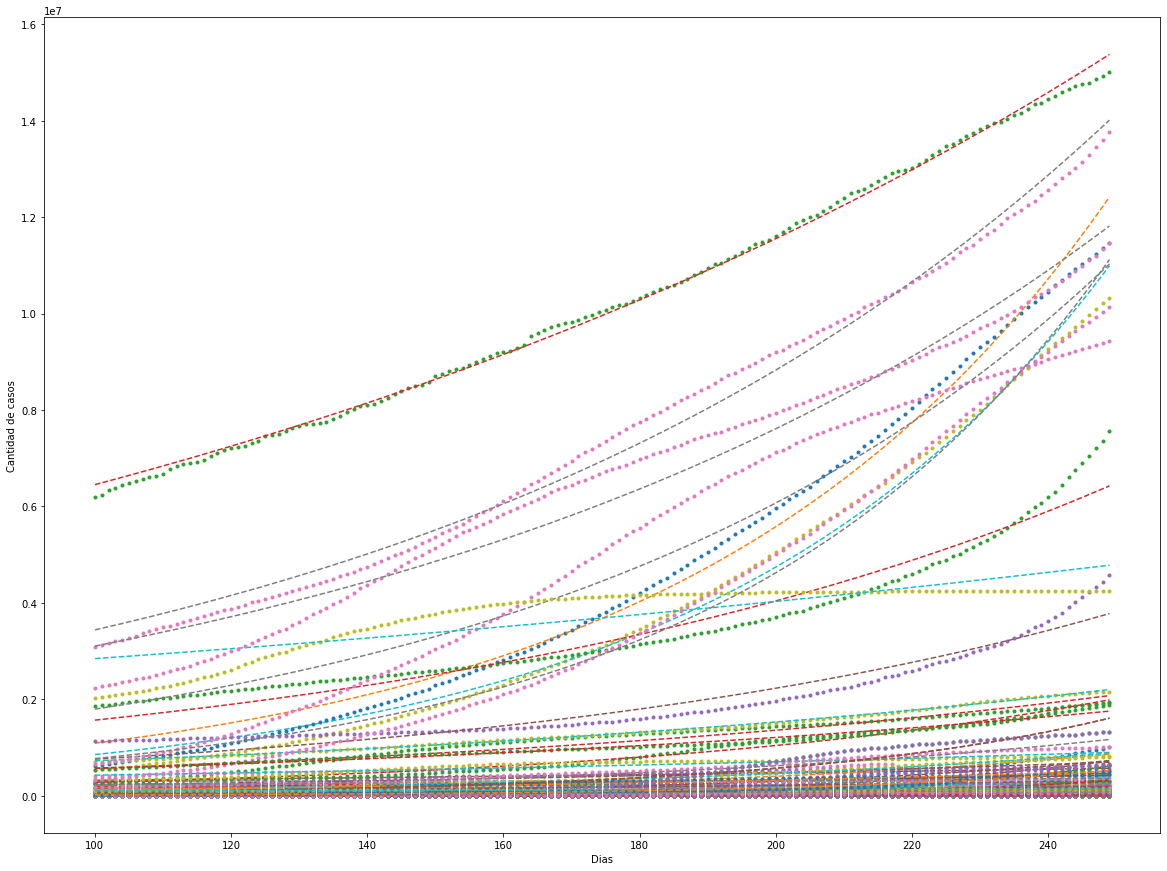

In [112]:
#Hacemos un for para no tener que copiar el código para cada pais.
# pais = ['Argentina', 'United States', 'Brazil', 'Italy', 'China', 'Sweden', 'Spain', 'South Korea', 'Norway', 'Australia']
pais = pais_covid
dia_inicio = 100
dia_fin = 250
k_paises=[]
plt.figure(figsize=(20,15))

for i in pais:
    ind=np.where(paises==i)
    ind=ind[0]
    casos=confirmados[ind]
    dias=np.arange(0,len(casos))
    casos_principio = casos[dia_inicio:dia_fin]
    dias_principio = dias[dia_inicio:dia_fin]
    popt, pcov = curve_fit(exponencial, dias_principio, casos_principio, maxfev=10000000) #con instancias que son valores nan, la funcion exponencial no corre
    #print('valores popt',popt)
    #print('valores pcov',pcov)
    k=popt[0]
    t0=popt[1]
    k_paises.append(k)
    casos_simu=exponencial(dias_principio,k,t0)
    plt.plot(dias_principio,casos_principio,'.')
    plt.plot(dias_principio,casos_simu,'--')
    plt.legend(['Casos reales', 'Casos simulados'], fontsize=12, facecolor='grey')
    plt.legend(['Casos reales', 'Casos simulados'], fontsize=12, facecolor='bisque')
    plt.xlabel('Dias')
    plt.ylabel('Cantidad de casos')
#     plt.legend(i)
    print("Valor de k para", i,":", k)
    #print(t0)

In [113]:
# chequeo de valor k mayor a cero
for k in k_paises:
    k_final= k > 0
    print(k_final)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [114]:
k_paises

[0.001663874892843281,
 0.00865336175509956,
 0.014935240268953374,
 0.008035118924439814,
 0.007766344903320981,
 0.019235394607210896,
 0.004373452001960415,
 0.02560031797110564,
 0.002697340280609236,
 0.017148877447126794,
 0.01632449527597046,
 0.003446790084396268,
 0.028821553716164742,
 1.1127881227795307e-07,
 0.022841722981620037,
 0.006259312155507212,
 0.00722560138073104,
 0.006092349093996604,
 1.1784981738609038e-06,
 0.025118694866076017,
 0.024180648454538756,
 0.004059495430482807,
 0.00958128326159571,
 0.005488456201371112,
 0.013214795021015462,
 3.2207691801233923e-07,
 0.00582719968664211,
 0.00045249113227359454,
 0.017334417209984583,
 0.008076027649780774,
 0.004805016973407166,
 0.007221918316452387,
 0.0029259661519410547,
 0.006002538856073069,
 0.012142855660212412,
 0.0003352839115688225,
 0.005537889783979447,
 0.003859536478786942,
 0.00023900200802195472,
 0.007455452288056495,
 0.005489339960605361,
 0.004477039547166558,
 0.01749693962425009,
 0.002

NameError: name 'k_paises_2' is not defined

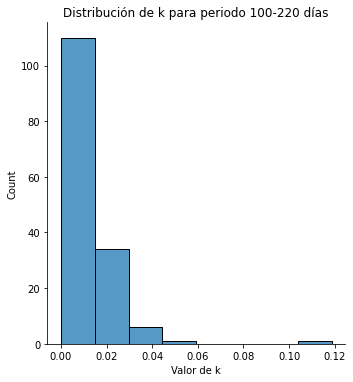

In [213]:
sns.displot(k_paises, bins=8)
plt.title('Distribución de k para periodo 100-220 días')
plt.xlabel('Valor de k')

sns.displot(k_paises_2, bins=8)
plt.title('Distribución de k para periodo 20-80 días')
plt.xlabel('Valor de k')
plt.show()

In [115]:
datos_k = k_paises

In [116]:
z= abs(stats.norm.ppf(0.05/2))
print(z)
n=len(datos_k)
n

1.9599639845400545


152

In [117]:
mu_muestra=np.mean(datos_k)
sigma_muestra=np.std(datos_k)
print(mu_muestra)
print(sigma_muestra)

0.011622682861707201
0.012626395010013749


In [118]:
int_conf=[mu_muestra-z*sigma_muestra/np.sqrt(n),mu_muestra+z*sigma_muestra/np.sqrt(n)]
print(int_conf)

[0.009615413438994504, 0.013629952284419898]


In [119]:
int_conf[1]-int_conf[0]

0.004014538845425394

In [120]:
k_mundo #cae por fuera del intervalo de confianza de los valores maximos

0.017126404714268968

# PARTE 2

### AGREGADO DE VARIABLES BINARIAS PARA VACUNADOS - CUARENTENA

- Politicas: cuarentena - vacunacion - cierre de frontera (3 columnas con 0 y 1 para cada politica)
- Casos: 2 columnas. 1 con cantidad de casos diarios y otra con 0 y 1 de acuerdo a si aumentaron o disminuyeron los casos

In [121]:
arg = datos.loc[datos['Entity'] == 'Argentina']
arg

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
4515,Argentina,ARG,2020-01-01,4.0,tests performed,NaN,NaN
4516,Argentina,ARG,2020-01-02,53.0,tests performed,NaN,NaN
4517,Argentina,ARG,2020-01-03,58.0,tests performed,NaN,NaN
4518,Argentina,ARG,2020-01-04,133.0,tests performed,NaN,NaN
4519,Argentina,ARG,2020-01-05,146.0,tests performed,NaN,NaN
...,...,...,...,...,...,...,...
5198,Argentina,ARG,2021-12-01,NaN,NaN,116597.0,5332629.0
5199,Argentina,ARG,2021-12-02,NaN,NaN,116617.0,5335310.0
5200,Argentina,ARG,2021-12-03,NaN,NaN,116639.0,5337692.0
5201,Argentina,ARG,2021-12-04,NaN,NaN,116643.0,5339382.0


In [122]:
arg = arg.fillna(0.0001)

In [123]:
#Este primer comando agrega la columna 'Casos por dia' y calcula los casos diarios restando el dia de hoy al de ayer
primero = True

for index, row in arg.iterrows():
    if primero:
        arg.loc[index, "Casos por día"] = arg.loc[index, "Total confirmed cases of COVID-19"]
        primero = False
    else:
        arg.loc[index, "Casos por día"] = arg.loc[index, "Total confirmed cases of COVID-19"] - arg.loc[index-1, "Total confirmed cases of COVID-19"]

arg.head(50)


,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos por día
4515,Argentina,ARG,2020-01-01,4.0,tests performed,0.0001,0.0001,0.0001
4516,Argentina,ARG,2020-01-02,53.0,tests performed,0.0001,0.0001,0.0000
4517,Argentina,ARG,2020-01-03,58.0,tests performed,0.0001,0.0001,0.0000
4518,Argentina,ARG,2020-01-04,133.0,tests performed,0.0001,0.0001,0.0000
4519,Argentina,ARG,2020-01-05,146.0,tests performed,0.0001,0.0001,0.0000
4520,Argentina,ARG,2020-01-06,200.0,tests performed,0.0001,0.0001,0.0000
4521,Argentina,ARG,2020-01-07,230.0,tests performed,0.0001,0.0001,0.0000
4522,Argentina,ARG,2020-01-08,235.0,tests performed,0.0001,0.0001,0.0000
4523,Argentina,ARG,2020-01-09,236.0,tests performed,0.0001,0.0001,0.0000
4524,Argentina,ARG,2020-01-10,315.0,tests performed,0.0001,0.0001,0.0000


In [124]:
#Aca calculo la variacion de casos entre el paso de los dias
primero = True

for index, row in arg.iterrows():
    if primero:
        arg.loc[index, "Variación casos"] = arg.loc[index, "Casos por día"]
        primero = False
    else:
        arg.loc[index, "Variación casos"] = arg.loc[index, "Casos por día"] - arg.loc[index-1, "Casos por día"]
        
arg


,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos por día,Variación casos
4515,Argentina,ARG,2020-01-01,4.0000,tests performed,0.0001,1.000000e-04,0.0001,0.0001
4516,Argentina,ARG,2020-01-02,53.0000,tests performed,0.0001,1.000000e-04,0.0000,-0.0001
4517,Argentina,ARG,2020-01-03,58.0000,tests performed,0.0001,1.000000e-04,0.0000,0.0000
4518,Argentina,ARG,2020-01-04,133.0000,tests performed,0.0001,1.000000e-04,0.0000,0.0000
4519,Argentina,ARG,2020-01-05,146.0000,tests performed,0.0001,1.000000e-04,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...
5198,Argentina,ARG,2021-12-01,0.0001,0.0001,116597.0000,5.332629e+06,1881.0000,-451.0000
5199,Argentina,ARG,2021-12-02,0.0001,0.0001,116617.0000,5.335310e+06,2681.0000,800.0000
5200,Argentina,ARG,2021-12-03,0.0001,0.0001,116639.0000,5.337692e+06,2382.0000,-299.0000
5201,Argentina,ARG,2021-12-04,0.0001,0.0001,116643.0000,5.339382e+06,1690.0000,-692.0000


In [125]:
#Coloco 0 y 1 de acuerdo a si los casos aumentaron o disminuyeron dia a dia

for index, row in arg.iterrows():
    if arg.loc[index, "Variación casos"] > 0: 
        arg.loc[index, "Variacion Casos Binaria"] = 0 # MALO – MUERTOS – CONTAGIADOS = 0
    else:
        arg.loc[index, "Variacion Casos Binaria"] = 1 #BUENO – VIVO – NO CONTAGIO = 1
        
arg


,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos por día,Variación casos,Variacion Casos Binaria
4515,Argentina,ARG,2020-01-01,4.0000,tests performed,0.0001,1.000000e-04,0.0001,0.0001,0.0
4516,Argentina,ARG,2020-01-02,53.0000,tests performed,0.0001,1.000000e-04,0.0000,-0.0001,1.0
4517,Argentina,ARG,2020-01-03,58.0000,tests performed,0.0001,1.000000e-04,0.0000,0.0000,1.0
4518,Argentina,ARG,2020-01-04,133.0000,tests performed,0.0001,1.000000e-04,0.0000,0.0000,1.0
4519,Argentina,ARG,2020-01-05,146.0000,tests performed,0.0001,1.000000e-04,0.0000,0.0000,1.0
...,...,...,...,...,...,...,...,...,...,...
5198,Argentina,ARG,2021-12-01,0.0001,0.0001,116597.0000,5.332629e+06,1881.0000,-451.0000,1.0
5199,Argentina,ARG,2021-12-02,0.0001,0.0001,116617.0000,5.335310e+06,2681.0000,800.0000,0.0
5200,Argentina,ARG,2021-12-03,0.0001,0.0001,116639.0000,5.337692e+06,2382.0000,-299.0000,1.0
5201,Argentina,ARG,2021-12-04,0.0001,0.0001,116643.0000,5.339382e+06,1690.0000,-692.0000,1.0


In [126]:
from datetime import date

for index, row in arg.iterrows():
    fecha = row['Day']
    fecha = fecha.split("-")
    año = int(fecha[0])
    mes = int(fecha[1])
    dia = int(fecha[2])

    fechaActual = date(año, mes, dia)

    if fechaActual < date(2020,12,29):
        arg.loc[index, "Vacunacion"] = 0 #no esta vacunado
    else:
        arg.loc[index, "Vacunacion"] = 1 #esta vacunado
arg

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos por día,Variación casos,Variacion Casos Binaria,Vacunacion
4515,Argentina,ARG,2020-01-01,4.0000,tests performed,0.0001,1.000000e-04,0.0001,0.0001,0.0,0.0
4516,Argentina,ARG,2020-01-02,53.0000,tests performed,0.0001,1.000000e-04,0.0000,-0.0001,1.0,0.0
4517,Argentina,ARG,2020-01-03,58.0000,tests performed,0.0001,1.000000e-04,0.0000,0.0000,1.0,0.0
4518,Argentina,ARG,2020-01-04,133.0000,tests performed,0.0001,1.000000e-04,0.0000,0.0000,1.0,0.0
4519,Argentina,ARG,2020-01-05,146.0000,tests performed,0.0001,1.000000e-04,0.0000,0.0000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5198,Argentina,ARG,2021-12-01,0.0001,0.0001,116597.0000,5.332629e+06,1881.0000,-451.0000,1.0,1.0
5199,Argentina,ARG,2021-12-02,0.0001,0.0001,116617.0000,5.335310e+06,2681.0000,800.0000,0.0,1.0
5200,Argentina,ARG,2021-12-03,0.0001,0.0001,116639.0000,5.337692e+06,2382.0000,-299.0000,1.0,1.0
5201,Argentina,ARG,2021-12-04,0.0001,0.0001,116643.0000,5.339382e+06,1690.0000,-692.0000,1.0,1.0


In [127]:
for index, row in arg.iterrows():
    fecha = row['Day']
    fecha = fecha.split("-")
    año = int(fecha[0])
    mes = int(fecha[1])
    dia = int(fecha[2])

    fechaActual = date(año, mes, dia)

    if fechaActual > date(2020,3,18) and fechaActual < date(2020,4,27):
        arg.loc[index, "Cuarentena"] = 1 #Con cuaretena
    else:
        arg.loc[index, "Cuarentena"] = 0 #Sin cuarentena
arg

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos por día,Variación casos,Variacion Casos Binaria,Vacunacion,Cuarentena
4515,Argentina,ARG,2020-01-01,4.0000,tests performed,0.0001,1.000000e-04,0.0001,0.0001,0.0,0.0,0.0
4516,Argentina,ARG,2020-01-02,53.0000,tests performed,0.0001,1.000000e-04,0.0000,-0.0001,1.0,0.0,0.0
4517,Argentina,ARG,2020-01-03,58.0000,tests performed,0.0001,1.000000e-04,0.0000,0.0000,1.0,0.0,0.0
4518,Argentina,ARG,2020-01-04,133.0000,tests performed,0.0001,1.000000e-04,0.0000,0.0000,1.0,0.0,0.0
4519,Argentina,ARG,2020-01-05,146.0000,tests performed,0.0001,1.000000e-04,0.0000,0.0000,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5198,Argentina,ARG,2021-12-01,0.0001,0.0001,116597.0000,5.332629e+06,1881.0000,-451.0000,1.0,1.0,0.0
5199,Argentina,ARG,2021-12-02,0.0001,0.0001,116617.0000,5.335310e+06,2681.0000,800.0000,0.0,1.0,0.0
5200,Argentina,ARG,2021-12-03,0.0001,0.0001,116639.0000,5.337692e+06,2382.0000,-299.0000,1.0,1.0,0.0
5201,Argentina,ARG,2021-12-04,0.0001,0.0001,116643.0000,5.339382e+06,1690.0000,-692.0000,1.0,1.0,0.0


In [128]:
arg.head(104)

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos por día,Variación casos,Variacion Casos Binaria,Vacunacion,Cuarentena
4515,Argentina,ARG,2020-01-01,4.0,tests performed,0.0001,0.0001,0.0001,0.0001,0.0,0.0,0.0
4516,Argentina,ARG,2020-01-02,53.0,tests performed,0.0001,0.0001,0.0000,-0.0001,1.0,0.0,0.0
4517,Argentina,ARG,2020-01-03,58.0,tests performed,0.0001,0.0001,0.0000,0.0000,1.0,0.0,0.0
4518,Argentina,ARG,2020-01-04,133.0,tests performed,0.0001,0.0001,0.0000,0.0000,1.0,0.0,0.0
4519,Argentina,ARG,2020-01-05,146.0,tests performed,0.0001,0.0001,0.0000,0.0000,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4614,Argentina,ARG,2020-04-26,59297.0,tests performed,192.0000,3892.0000,112.0000,-61.0000,1.0,0.0,1.0
4615,Argentina,ARG,2020-04-27,61535.0,tests performed,197.0000,4003.0000,111.0000,-1.0000,1.0,0.0,0.0
4616,Argentina,ARG,2020-04-28,64480.0,tests performed,207.0000,4127.0000,124.0000,13.0000,0.0,0.0,0.0
4617,Argentina,ARG,2020-04-29,67581.0,tests performed,214.0000,4285.0000,158.0000,34.0000,0.0,0.0,0.0


In [129]:
arg

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos por día,Variación casos,Variacion Casos Binaria,Vacunacion,Cuarentena
4515,Argentina,ARG,2020-01-01,4.0000,tests performed,0.0001,1.000000e-04,0.0001,0.0001,0.0,0.0,0.0
4516,Argentina,ARG,2020-01-02,53.0000,tests performed,0.0001,1.000000e-04,0.0000,-0.0001,1.0,0.0,0.0
4517,Argentina,ARG,2020-01-03,58.0000,tests performed,0.0001,1.000000e-04,0.0000,0.0000,1.0,0.0,0.0
4518,Argentina,ARG,2020-01-04,133.0000,tests performed,0.0001,1.000000e-04,0.0000,0.0000,1.0,0.0,0.0
4519,Argentina,ARG,2020-01-05,146.0000,tests performed,0.0001,1.000000e-04,0.0000,0.0000,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5198,Argentina,ARG,2021-12-01,0.0001,0.0001,116597.0000,5.332629e+06,1881.0000,-451.0000,1.0,1.0,0.0
5199,Argentina,ARG,2021-12-02,0.0001,0.0001,116617.0000,5.335310e+06,2681.0000,800.0000,0.0,1.0,0.0
5200,Argentina,ARG,2021-12-03,0.0001,0.0001,116639.0000,5.337692e+06,2382.0000,-299.0000,1.0,1.0,0.0
5201,Argentina,ARG,2021-12-04,0.0001,0.0001,116643.0000,5.339382e+06,1690.0000,-692.0000,1.0,1.0,0.0


In [130]:
#Cierre total de fronteras
# International travel controls:
# 0 - No measures
# 1 - Screening
# 2 - Quarantine arrivals from high-risk regions
# 3 - Ban on high-risk regions
# 4 - Total border closure

#       inicio - fin
#1. 16/03/2020 - 05/11/2020 
#2. 04/05/2021 - 30/09/2021

for index, row in arg.iterrows():
    fecha = row['Day']
    fecha = fecha.split("-")
    año = int(fecha[0])
    mes = int(fecha[1])
    dia = int(fecha[2])

    fechaActual = date(año, mes, dia)
    
    if fechaActual > date(2020,3,15) and fechaActual < date(2020,11,6):
        arg.loc[index, "Cierre Total Frontera"] = 1 #Con cierre de fronteras
    
    elif fechaActual > date(2021,5,3) and fechaActual < date(2021,10,1):
         arg.loc[index, "Cierre Total Frontera"] = 1 #Cierre de fronteras
            
    else:
        arg.loc[index, "Cierre Total Frontera"] = 0 #Apertura de fronteras
arg

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos por día,Variación casos,Variacion Casos Binaria,Vacunacion,Cuarentena,Cierre Total Frontera
4515,Argentina,ARG,2020-01-01,4.0000,tests performed,0.0001,1.000000e-04,0.0001,0.0001,0.0,0.0,0.0,0.0
4516,Argentina,ARG,2020-01-02,53.0000,tests performed,0.0001,1.000000e-04,0.0000,-0.0001,1.0,0.0,0.0,0.0
4517,Argentina,ARG,2020-01-03,58.0000,tests performed,0.0001,1.000000e-04,0.0000,0.0000,1.0,0.0,0.0,0.0
4518,Argentina,ARG,2020-01-04,133.0000,tests performed,0.0001,1.000000e-04,0.0000,0.0000,1.0,0.0,0.0,0.0
4519,Argentina,ARG,2020-01-05,146.0000,tests performed,0.0001,1.000000e-04,0.0000,0.0000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5198,Argentina,ARG,2021-12-01,0.0001,0.0001,116597.0000,5.332629e+06,1881.0000,-451.0000,1.0,1.0,0.0,0.0
5199,Argentina,ARG,2021-12-02,0.0001,0.0001,116617.0000,5.335310e+06,2681.0000,800.0000,0.0,1.0,0.0,0.0
5200,Argentina,ARG,2021-12-03,0.0001,0.0001,116639.0000,5.337692e+06,2382.0000,-299.0000,1.0,1.0,0.0,0.0
5201,Argentina,ARG,2021-12-04,0.0001,0.0001,116643.0000,5.339382e+06,1690.0000,-692.0000,1.0,1.0,0.0,0.0


In [131]:
arg.loc[arg['Day'] == '2020-03-18']

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos por día,Variación casos,Variacion Casos Binaria,Vacunacion,Cuarentena,Cierre Total Frontera
4575,Argentina,ARG,2020-03-18,1506.0,tests performed,2.0,79.0,11.0,-1.0,1.0,0.0,0.0,1.0


# AGREGO AL DATASET ORIGINAL COMPLETO LAS POLITICAS ELEGIDAS

In [132]:
datos=pd.read_csv('C:/Users/paolo/Documents/DataScience-Acamica/SPRINT4_Predicciones_inferencias_incertezas/SPRINT_4/dataset_JUAN/covid-tests-cases-deaths.csv')
datos.head(10)

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
0,Afghanistan,AFG,2020-03-23,NaN,NaN,1.0,40.0
1,Afghanistan,AFG,2020-03-24,NaN,NaN,1.0,42.0
2,Afghanistan,AFG,2020-03-25,NaN,NaN,1.0,74.0
3,Afghanistan,AFG,2020-03-26,NaN,NaN,2.0,80.0
4,Afghanistan,AFG,2020-03-27,NaN,NaN,2.0,91.0
5,Afghanistan,AFG,2020-03-28,NaN,NaN,2.0,106.0
6,Afghanistan,AFG,2020-03-29,NaN,NaN,4.0,114.0
7,Afghanistan,AFG,2020-03-30,NaN,NaN,4.0,114.0
8,Afghanistan,AFG,2020-03-31,NaN,NaN,4.0,166.0
9,Afghanistan,AFG,2020-04-01,NaN,NaN,4.0,192.0


In [133]:
datos.isnull().sum()

Entity                                        0
Code                                      12532
Day                                           0
total_tests                               75368
142601-annotations                        77144
Total confirmed deaths due to COVID-19    13363
Total confirmed cases of COVID-19          1840
dtype: int64

In [134]:
datos.shape

(135124, 7)

In [135]:
datos = datos.fillna(0.0001)

In [136]:
datos.isnull().sum()

Entity                                    0
Code                                      0
Day                                       0
total_tests                               0
142601-annotations                        0
Total confirmed deaths due to COVID-19    0
Total confirmed cases of COVID-19         0
dtype: int64

In [137]:
datos.shape

(135124, 7)

In [138]:
#Este primer comando agrega la columna 'Casos por dia' y calcula los casos diarios restando el dia de hoy al de ayer
primero = True

for index, row in datos.iterrows():
    if primero:
        datos.loc[index, "Casos por día"] = datos.loc[index, "Total confirmed cases of COVID-19"]
        primero = False
    else:
        datos.loc[index, "Casos por día"] = datos.loc[index, "Total confirmed cases of COVID-19"] - datos.loc[index-1, "Total confirmed cases of COVID-19"]

datos.head(50)


,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos por día
0,Afghanistan,AFG,2020-03-23,0.0001,0.0001,1.0,40.0,40.0
1,Afghanistan,AFG,2020-03-24,0.0001,0.0001,1.0,42.0,2.0
2,Afghanistan,AFG,2020-03-25,0.0001,0.0001,1.0,74.0,32.0
3,Afghanistan,AFG,2020-03-26,0.0001,0.0001,2.0,80.0,6.0
4,Afghanistan,AFG,2020-03-27,0.0001,0.0001,2.0,91.0,11.0
5,Afghanistan,AFG,2020-03-28,0.0001,0.0001,2.0,106.0,15.0
6,Afghanistan,AFG,2020-03-29,0.0001,0.0001,4.0,114.0,8.0
7,Afghanistan,AFG,2020-03-30,0.0001,0.0001,4.0,114.0,0.0
8,Afghanistan,AFG,2020-03-31,0.0001,0.0001,4.0,166.0,52.0
9,Afghanistan,AFG,2020-04-01,0.0001,0.0001,4.0,192.0,26.0


In [139]:
#Aca calculo la variacion de casos entre el paso de los dias
primero = True

for index, row in datos.iterrows():
    if primero:
        datos.loc[index, "Variación casos"] = datos.loc[index, "Casos por día"]
        primero = False
    else:
        datos.loc[index, "Variación casos"] = datos.loc[index, "Casos por día"] - datos.loc[index-1, "Casos por día"]
        
datos


,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos por día,Variación casos
0,Afghanistan,AFG,2020-03-23,0.0001,0.0001,1.0000,40.0,40.0,40.0
1,Afghanistan,AFG,2020-03-24,0.0001,0.0001,1.0000,42.0,2.0,-38.0
2,Afghanistan,AFG,2020-03-25,0.0001,0.0001,1.0000,74.0,32.0,30.0
3,Afghanistan,AFG,2020-03-26,0.0001,0.0001,2.0000,80.0,6.0,-26.0
4,Afghanistan,AFG,2020-03-27,0.0001,0.0001,2.0000,91.0,11.0,5.0
...,...,...,...,...,...,...,...,...,...
135119,Zimbabwe,ZWE,2020-09-05,0.0001,0.0001,206.0000,6837.0,6781.0,6762.0
135120,Zimbabwe,ZWE,2021-12-05,0.0001,0.0001,4710.0000,139046.0,132209.0,125428.0
135121,Zimbabwe,ZWE,2020-03-20,0.0001,0.0001,0.0001,1.0,-139045.0,-271254.0
135122,Zimbabwe,ZWE,2020-03-21,0.0001,0.0001,0.0001,3.0,2.0,139047.0


In [140]:
#Coloco 0 y 1 de acuerdo a si los casos aumentaron o disminuyeron dia a dia

for index, row in datos.iterrows():
    if datos.loc[index, "Variación casos"] > 0: 
        datos.loc[index, "Variacion Casos Binaria"] = 0 # MALO – MUERTOS – CONTAGIADOS AUMENTAN = 0
    else:
        datos.loc[index, "Variacion Casos Binaria"] = 1 #BUENO – VIVO – NO CONTAGIO -DISMINUCION CASOS - MENOS CASOS = 1
        
datos


,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos por día,Variación casos,Variacion Casos Binaria
0,Afghanistan,AFG,2020-03-23,0.0001,0.0001,1.0000,40.0,40.0,40.0,0.0
1,Afghanistan,AFG,2020-03-24,0.0001,0.0001,1.0000,42.0,2.0,-38.0,1.0
2,Afghanistan,AFG,2020-03-25,0.0001,0.0001,1.0000,74.0,32.0,30.0,0.0
3,Afghanistan,AFG,2020-03-26,0.0001,0.0001,2.0000,80.0,6.0,-26.0,1.0
4,Afghanistan,AFG,2020-03-27,0.0001,0.0001,2.0000,91.0,11.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...
135119,Zimbabwe,ZWE,2020-09-05,0.0001,0.0001,206.0000,6837.0,6781.0,6762.0,0.0
135120,Zimbabwe,ZWE,2021-12-05,0.0001,0.0001,4710.0000,139046.0,132209.0,125428.0,0.0
135121,Zimbabwe,ZWE,2020-03-20,0.0001,0.0001,0.0001,1.0,-139045.0,-271254.0,1.0
135122,Zimbabwe,ZWE,2020-03-21,0.0001,0.0001,0.0001,3.0,2.0,139047.0,0.0


In [141]:
#Observo la cantidad de 0 o 1 hay en la columna de Variacion Casos Binaria para ver si estan balanceados
#Luego en el modelo con los paises seleccionados tendria que chequear lo mismo
datos['Variacion Casos Binaria'].unique().sum()


1.0

In [142]:
# Guardo el dataset que esta en memoria a la carpeta
datos.to_csv('datos_2.csv')

In [143]:
#Cargo los dataset con las politicas
df_cuarentena = pd.read_csv('C:/Users/paolo/Documents/DataScience-Acamica/SPRINT4_Predicciones_inferencias_incertezas/SPRINT_4/dataset_politicas/stay-at-home-covid.csv')
df_cuarentena.head(10)

df_viajes_int = pd.read_csv('C:/Users/paolo/Documents/DataScience-Acamica/SPRINT4_Predicciones_inferencias_incertezas/SPRINT_4/dataset_politicas/international-travel-covid.csv')
df_viajes_int.head(10)

df_vacunacion = pd.read_csv('C:/Users/paolo/Documents/DataScience-Acamica/SPRINT4_Predicciones_inferencias_incertezas/SPRINT_4/dataset_politicas/covid-vaccination-policy.csv')
df_vacunacion.head(10)

,Entity,Code,Day,vaccination_policy
0,Afghanistan,AFG,2020-01-01,0
1,Afghanistan,AFG,2020-01-02,0
2,Afghanistan,AFG,2020-01-03,0
3,Afghanistan,AFG,2020-01-04,0
4,Afghanistan,AFG,2020-01-05,0
5,Afghanistan,AFG,2020-01-06,0
6,Afghanistan,AFG,2020-01-07,0
7,Afghanistan,AFG,2020-01-08,0
8,Afghanistan,AFG,2020-01-09,0
9,Afghanistan,AFG,2020-01-10,0


In [144]:
df_cuarentena = df_cuarentena.drop(columns = ['Code'])
df_cuarentena

,Entity,Day,stay_home_requirements
0,Afghanistan,2020-01-01,0
1,Afghanistan,2020-01-02,0
2,Afghanistan,2020-01-03,0
3,Afghanistan,2020-01-04,0
4,Afghanistan,2020-01-05,0
...,...,...,...
136982,Zimbabwe,2022-01-04,2
136983,Zimbabwe,2022-01-05,2
136984,Zimbabwe,2022-01-06,2
136985,Zimbabwe,2022-01-07,2


In [145]:
df_viajes_int = df_viajes_int.drop(columns = ['Code'])
df_viajes_int

,Entity,Day,international_travel_controls
0,Afghanistan,2020-01-01,0
1,Afghanistan,2020-01-02,0
2,Afghanistan,2020-01-03,0
3,Afghanistan,2020-01-04,0
4,Afghanistan,2020-01-05,0
...,...,...,...
137056,Zimbabwe,2022-01-04,2
137057,Zimbabwe,2022-01-05,2
137058,Zimbabwe,2022-01-06,2
137059,Zimbabwe,2022-01-07,2


In [146]:
df_vacunacion = df_vacunacion.drop(columns = ['Code'])
df_vacunacion

,Entity,Day,vaccination_policy
0,Afghanistan,2020-01-01,0
1,Afghanistan,2020-01-02,0
2,Afghanistan,2020-01-03,0
3,Afghanistan,2020-01-04,0
4,Afghanistan,2020-01-05,0
...,...,...,...
137052,Zimbabwe,2022-01-04,5
137053,Zimbabwe,2022-01-05,5
137054,Zimbabwe,2022-01-06,5
137055,Zimbabwe,2022-01-07,5


In [147]:
#Hago los merge
datos_politicas_1 = pd.merge(datos, df_cuarentena, on=['Day','Entity'])
datos_politicas_2 = pd.merge(datos_politicas_1, df_viajes_int, on=['Day','Entity'])
datos_politicas_3 = pd.merge(datos_politicas_2, df_vacunacion, on=['Day','Entity'])

datos_final = datos_politicas_3
datos_final

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos por día,Variación casos,Variacion Casos Binaria,stay_home_requirements,international_travel_controls,vaccination_policy
0,Afghanistan,AFG,2020-03-23,0.0001,0.0001,1.0000,40.0,40.0,40.0,0.0,0,3,0
1,Afghanistan,AFG,2020-03-24,0.0001,0.0001,1.0000,42.0,2.0,-38.0,1.0,0,3,0
2,Afghanistan,AFG,2020-03-25,0.0001,0.0001,1.0000,74.0,32.0,30.0,0.0,2,3,0
3,Afghanistan,AFG,2020-03-26,0.0001,0.0001,2.0000,80.0,6.0,-26.0,1.0,2,3,0
4,Afghanistan,AFG,2020-03-27,0.0001,0.0001,2.0000,91.0,11.0,5.0,0.0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111503,Zimbabwe,ZWE,2020-09-05,0.0001,0.0001,206.0000,6837.0,6781.0,6762.0,0.0,2,4,0
111504,Zimbabwe,ZWE,2021-12-05,0.0001,0.0001,4710.0000,139046.0,132209.0,125428.0,0.0,2,2,5
111505,Zimbabwe,ZWE,2020-03-20,0.0001,0.0001,0.0001,1.0,-139045.0,-271254.0,1.0,0,1,0
111506,Zimbabwe,ZWE,2020-03-21,0.0001,0.0001,0.0001,3.0,2.0,139047.0,0.0,0,1,0


In [148]:
datos_final.stay_home_requirements.unique()

array([0, 2, 3, 1], dtype=int64)

In [149]:
# politica = ['stay_home_requirements', ]

for index, row in datos_final.iterrows():
    if datos_final.loc[index, 'stay_home_requirements'] == 3: 
        datos_final.loc[index, 'stay_home_requirements'] = 1 # Cuarentena
    else:
        datos_final.loc[index, 'stay_home_requirements'] = 0 # No # Cuarentena
        
datos_final

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos por día,Variación casos,Variacion Casos Binaria,stay_home_requirements,international_travel_controls,vaccination_policy
0,Afghanistan,AFG,2020-03-23,0.0001,0.0001,1.0000,40.0,40.0,40.0,0.0,0,3,0
1,Afghanistan,AFG,2020-03-24,0.0001,0.0001,1.0000,42.0,2.0,-38.0,1.0,0,3,0
2,Afghanistan,AFG,2020-03-25,0.0001,0.0001,1.0000,74.0,32.0,30.0,0.0,0,3,0
3,Afghanistan,AFG,2020-03-26,0.0001,0.0001,2.0000,80.0,6.0,-26.0,1.0,0,3,0
4,Afghanistan,AFG,2020-03-27,0.0001,0.0001,2.0000,91.0,11.0,5.0,0.0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111503,Zimbabwe,ZWE,2020-09-05,0.0001,0.0001,206.0000,6837.0,6781.0,6762.0,0.0,0,4,0
111504,Zimbabwe,ZWE,2021-12-05,0.0001,0.0001,4710.0000,139046.0,132209.0,125428.0,0.0,0,2,5
111505,Zimbabwe,ZWE,2020-03-20,0.0001,0.0001,0.0001,1.0,-139045.0,-271254.0,1.0,0,1,0
111506,Zimbabwe,ZWE,2020-03-21,0.0001,0.0001,0.0001,3.0,2.0,139047.0,0.0,0,1,0


In [150]:
datos_final.stay_home_requirements.unique()

array([0, 1], dtype=int64)

In [151]:
for index, row in datos_final.iterrows():
    if datos_final.loc[index, 'international_travel_controls'] == 4: 
        datos_final.loc[index, 'international_travel_controls'] = 1 # Cierre de frontera 
    else:
        datos_final.loc[index, 'international_travel_controls'] = 0 # Frontera abierta
        
datos_final

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos por día,Variación casos,Variacion Casos Binaria,stay_home_requirements,international_travel_controls,vaccination_policy
0,Afghanistan,AFG,2020-03-23,0.0001,0.0001,1.0000,40.0,40.0,40.0,0.0,0,0,0
1,Afghanistan,AFG,2020-03-24,0.0001,0.0001,1.0000,42.0,2.0,-38.0,1.0,0,0,0
2,Afghanistan,AFG,2020-03-25,0.0001,0.0001,1.0000,74.0,32.0,30.0,0.0,0,0,0
3,Afghanistan,AFG,2020-03-26,0.0001,0.0001,2.0000,80.0,6.0,-26.0,1.0,0,0,0
4,Afghanistan,AFG,2020-03-27,0.0001,0.0001,2.0000,91.0,11.0,5.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111503,Zimbabwe,ZWE,2020-09-05,0.0001,0.0001,206.0000,6837.0,6781.0,6762.0,0.0,0,1,0
111504,Zimbabwe,ZWE,2021-12-05,0.0001,0.0001,4710.0000,139046.0,132209.0,125428.0,0.0,0,0,5
111505,Zimbabwe,ZWE,2020-03-20,0.0001,0.0001,0.0001,1.0,-139045.0,-271254.0,1.0,0,0,0
111506,Zimbabwe,ZWE,2020-03-21,0.0001,0.0001,0.0001,3.0,2.0,139047.0,0.0,0,0,0


In [152]:
datos_final.international_travel_controls.unique()

array([0, 1], dtype=int64)

In [153]:
for index, row in datos_final.iterrows():
    if datos_final.loc[index, 'vaccination_policy'] >= 4: 
        datos_final.loc[index, 'vaccination_policy'] = 1 # Vacunacion ACITVA
    else:
        datos_final.loc[index, 'vaccination_policy'] = 0 # NO Vacunacion
        
datos_final

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos por día,Variación casos,Variacion Casos Binaria,stay_home_requirements,international_travel_controls,vaccination_policy
0,Afghanistan,AFG,2020-03-23,0.0001,0.0001,1.0000,40.0,40.0,40.0,0.0,0,0,0
1,Afghanistan,AFG,2020-03-24,0.0001,0.0001,1.0000,42.0,2.0,-38.0,1.0,0,0,0
2,Afghanistan,AFG,2020-03-25,0.0001,0.0001,1.0000,74.0,32.0,30.0,0.0,0,0,0
3,Afghanistan,AFG,2020-03-26,0.0001,0.0001,2.0000,80.0,6.0,-26.0,1.0,0,0,0
4,Afghanistan,AFG,2020-03-27,0.0001,0.0001,2.0000,91.0,11.0,5.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111503,Zimbabwe,ZWE,2020-09-05,0.0001,0.0001,206.0000,6837.0,6781.0,6762.0,0.0,0,1,0
111504,Zimbabwe,ZWE,2021-12-05,0.0001,0.0001,4710.0000,139046.0,132209.0,125428.0,0.0,0,0,1
111505,Zimbabwe,ZWE,2020-03-20,0.0001,0.0001,0.0001,1.0,-139045.0,-271254.0,1.0,0,0,0
111506,Zimbabwe,ZWE,2020-03-21,0.0001,0.0001,0.0001,3.0,2.0,139047.0,0.0,0,0,0


In [154]:
datos_final.vaccination_policy.unique()

array([0, 1], dtype=int64)

In [155]:
# Guardo el dataset que esta en memoria a la carpeta
datos_final.to_csv('datos_final.csv')

In [156]:
paises_a_seleccionar = ['Argentina', 'United States','Japan','Mexico', 'Brazil', 'Italy', 'China', 'Sweden', 'Spain', 'South Korea', 'Norway', 'Australia']
df_paises_selec = datos_final[datos_final['Entity'].isin(paises_a_seleccionar)]
df_paises_selec

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos por día,Variación casos,Variacion Casos Binaria,stay_home_requirements,international_travel_controls,vaccination_policy
3220,Argentina,ARG,2020-01-01,4.0000,tests performed,0.0001,0.0001,-14.9999,-14.9999,1.0,0,0,0
3221,Argentina,ARG,2020-01-02,53.0000,tests performed,0.0001,0.0001,0.0000,14.9999,0.0,0,0,0
3222,Argentina,ARG,2020-01-03,58.0000,tests performed,0.0001,0.0001,0.0000,0.0000,1.0,0,0,0
3223,Argentina,ARG,2020-01-04,133.0000,tests performed,0.0001,0.0001,0.0000,0.0000,1.0,0,0,0
3224,Argentina,ARG,2020-01-05,146.0000,tests performed,0.0001,0.0001,0.0000,0.0000,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106684,United States,USA,2020-02-24,0.0001,0.0001,0.0001,16.0000,0.0000,0.0000,1.0,0,0,0
106685,United States,USA,2020-02-25,0.0001,0.0001,0.0001,16.0000,0.0000,0.0000,1.0,0,0,0
106686,United States,USA,2020-02-26,0.0001,0.0001,0.0001,16.0000,0.0000,0.0000,1.0,0,0,0
106687,United States,USA,2020-02-27,0.0001,0.0001,0.0001,17.0000,1.0000,1.0000,0.0,0,0,0


# Modelo de Regresión Logística

- https://www.aprendemachinelearning.com/regresion-logistica-con-python-paso-a-paso/
- https://www.iartificial.net/como-usar-regresion-logistica-en-python/

In [222]:
#importo las librerias
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [223]:
#Defino las variables
X = df_paises_selec.drop(columns = ['Entity','Code','Day','total_tests','142601-annotations','Total confirmed deaths due to COVID-19','Total confirmed cases of COVID-19','Casos por día','Variación casos','Variacion Casos Binaria'], axis=1) #aca van los indicarotes/politicas
y = df_paises_selec['Variacion Casos Binaria'] #cantidad de casos en binario

In [224]:
X

,stay_home_requirements,international_travel_controls,vaccination_policy
3220,0,0,0
3221,0,0,0
3222,0,0,0
3223,0,0,0
3224,0,0,0
...,...,...,...
106684,0,0,0
106685,0,0,0
106686,0,0,0
106687,0,0,0


In [225]:
y

3220      1.0
3221      0.0
3222      1.0
3223      1.0
3224      1.0
         ... 
106684    1.0
106685    1.0
106686    1.0
106687    0.0
106688    1.0
Name: Variacion Casos Binaria, Length: 8131, dtype: float64

In [226]:
print(X.shape, y.shape)

(8131, 3) (8131,)


In [227]:
y.value_counts()

1.0    4342
0.0    3789
Name: Variacion Casos Binaria, dtype: int64

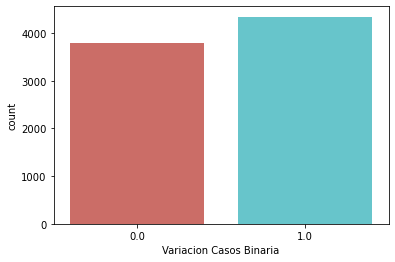

In [228]:
sns.countplot(x=y, palette='hls')
plt.show()

In [229]:
#Entreno el modelos teniendo dividiento el dataset en un 30% para entrenar (train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5691, 3) (5691,) (2440, 3) (2440,)


In [230]:
#creamos nuestro modelo y hacemos que se ajuste con el fit
model_RL = LogisticRegression()
model_RL.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [231]:
#hacemos clasificar todo nuestro conjunto de entradas X utilizando el método predict(X)
y_pred = model_RL.predict(X_test) #predictions = y_pred
print(y_pred)
y_test

[1. 1. 1. ... 1. 1. 1.]


4522     0.0
13701    1.0
51502    1.0
74707    1.0
50076    0.0
        ... 
4027     1.0
21248    1.0
65988    1.0
3682     1.0
14099    0.0
Name: Variacion Casos Binaria, Length: 2440, dtype: float64

In [232]:
valor = model_RL.coef_
efectividad_cuarentena = valor[0][0]
efectividad_cierre_frontera = valor[0][1]
efectividad_vacunacion = valor[0][2]

In [233]:
valor

array([[ 0.00781969, -0.15049649,  0.10300199]])

In [235]:
print('La efectividad de la cuarentena fue del: ' + str(efectividad_cuarentena))
print('La efectividad del cierre de la frontera fue del: ' + str(efectividad_cierre_frontera))
print('La efectividad de la vacunacion fue del: ' + str(efectividad_vacunacion))

La efectividad de la cuarentena fue del: 0.007819693594811813
La efectividad del cierre de la frontera fue del: -0.15049648949878922
La efectividad de la vacunacion fue del: 0.10300199484159982


# Reporte de Resultados del Modelo


In [167]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.5349061145883486


In [168]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.5266393442622951


In [169]:
# confirmamos cuan bueno fue nuestro modelo utilizando model.score()
model_RL.score(X_test,y_test)

0.5266393442622951

In [170]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.8546153846153847


In [171]:
#Calculo el Puntaje F1 del modelo
# Calculemos ahora el puntaje F1 que es una combinación entre la precisión y la sensibilidad
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.6579804560260587


In [172]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test, y_pred,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

# izq_sup: datos positivos reales (0)
# der_inf: datos negativos reales (1)
# izq_inf: datos falsos positivos
# der_sup: datos falsos negativos

Predicción,0.0,1.0
Real,,
0.0,174,966
1.0,189,1111


In [173]:
# Reporte total
predictions = model_RL.predict(X) #predictions = y_pred pero con el total de instancias
print(classification_report(y, predictions)) #ver que es lo que tengo que comparar aca

              precision    recall  f1-score   support

         0.0       0.50      0.16      0.24      3789
         1.0       0.54      0.86      0.66      4342

    accuracy                           0.53      8131
   macro avg       0.52      0.51      0.45      8131
weighted avg       0.52      0.53      0.46      8131



# OPTIMIZACION DE HIPERPARAMETROS DEL MODELO DE REGRESION LOGISTICA

In [193]:
#Genero un GridSearch para la optimizacion del Regresión logistica
from sklearn.model_selection import GridSearchCV
grid_RL = {'penalty':['l1', 'l2', 'elasticnet'],
           'C':[1.0,2.0, 3.0], 'fit_intercept':[True, False]}

In [194]:
#Grid Search
model_RL_OPT = GridSearchCV(model_RL, param_grid=grid_RL, cv=5)

In [195]:
import warnings 
warnings.filterwarnings('ignore')

model_RL_OPT.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 2.0, 3.0], 'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [192]:
print("Mejores parametros: "+str(model_RL_OPT.best_params_)+'\n')
print("Mejor Score: "+str(model_RL_OPT.best_score_)+'\n')
print("Mejor estimador: "+str(model_RL_OPT.best_estimator_)+'\n')

scores_RL_OPT = pd.DataFrame(model_RL_OPT.cv_results_)
scores_RL_OPT.head()

Mejores parametros: {'C': 1.0, 'fit_intercept': True, 'penalty': 'l2'}

Mejor Score: 0.5331222004317294

Mejor estimador: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_fit_intercept,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001800,0.000400,0.000000,0.000000,1,True,l1,"{'C': 1.0, 'fit_intercept': True, 'penalty': '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,0.015591,0.001356,0.002700,0.000746,1,True,l2,"{'C': 1.0, 'fit_intercept': True, 'penalty': '...",0.53468,0.536907,0.528120,0.526362,0.539543,0.533122,0.005074,1
2,0.003998,0.002278,0.000000,0.000000,1,True,elasticnet,"{'C': 1.0, 'fit_intercept': True, 'penalty': '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
3,0.001599,0.000489,0.000000,0.000000,1,False,l1,"{'C': 1.0, 'fit_intercept': False, 'penalty': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,0.019587,0.012476,0.002003,0.000638,1,False,l2,"{'C': 1.0, 'fit_intercept': False, 'penalty': ...",0.48288,0.521090,0.498243,0.498243,0.498243,0.499739,0.012221,4


In [196]:
#Defino nuevamente el modelo con los hiperparametros optimizados
model_RL_OPT_1 = LogisticRegression(C=1.0, fit_intercept=True, penalty='l2')

In [197]:
# Fiteo del X train e y train
model_RL_OPT_1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [198]:
model_RL_OPT_1.score(X_test,y_test)

0.5266393442622951

# Nuevas predicciones - Clasificación de nuevos paises

In [199]:
paises_nuevo_seleccionar = ['France', 'Netherlands', 'Canada'] # 'Venezuela', 'South Africa', 'South Africa', 'Costa Rica', 'Colombia', 'Austria', 'Cuba', 'United Kingdom', 'Canada'
Paises_nuevo = datos_final[datos_final['Entity'].isin(paises_nuevo_seleccionar)]
Paises_nuevo

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Casos por día,Variación casos,Variacion Casos Binaria,stay_home_requirements,international_travel_controls,vaccination_policy
18005,Canada,CAN,2020-01-31,0.0000,tests performed,0.0001,4.0,-62.0,-72.0,1.0,0,0,0
18006,Canada,CAN,2020-02-08,63.0000,tests performed,0.0001,7.0,3.0,65.0,0.0,0,0,0
18007,Canada,CAN,2020-02-16,109.0000,tests performed,0.0001,7.0,0.0,-3.0,1.0,0,0,0
18008,Canada,CAN,2020-02-21,166.0000,tests performed,0.0001,9.0,2.0,2.0,0.0,0,0,0
18009,Canada,CAN,2020-02-24,212.0000,tests performed,0.0001,10.0,1.0,-1.0,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72123,Netherlands,NLD,2020-03-01,0.0001,0.0001,0.0001,10.0,4.0,-1.0,1.0,0,0,0
72124,Netherlands,NLD,2020-03-02,0.0001,0.0001,0.0001,18.0,8.0,4.0,0.0,0,0,0
72125,Netherlands,NLD,2020-03-03,0.0001,0.0001,0.0001,24.0,6.0,-2.0,1.0,0,0,0
72126,Netherlands,NLD,2020-03-04,0.0001,0.0001,0.0001,38.0,14.0,8.0,0.0,0,0,0


In [200]:
Paises_nuevo.Entity.unique()

array(['Canada', 'France', 'Netherlands'], dtype=object)

In [201]:
X_nuevo = Paises_nuevo.drop(columns = ['Entity','Code','Day','total_tests','142601-annotations','Total confirmed deaths due to COVID-19','Total confirmed cases of COVID-19','Casos por día','Variación casos','Variacion Casos Binaria'], axis=1) #aca van los indicarotes/politicas
y_nuevo = Paises_nuevo['Variacion Casos Binaria'] #cantidad de casos en binario
X_nuevo


,stay_home_requirements,international_travel_controls,vaccination_policy
18005,0,0,0
18006,0,0,0
18007,0,0,0
18008,0,0,0
18009,0,0,0
...,...,...,...
72123,0,0,0
72124,0,0,0
72125,0,0,0
72126,0,0,0


In [202]:
# PREDICCION DETERMINISTICA
#hacemos clasificar todo nuestro conjunto de entradas X utilizando el método predict(X)
predictions = model_RL.predict(X_nuevo) #predictions = y_pred
# print(predictions)
predictions

array([1., 1., 1., ..., 1., 1., 1.])

- COMO DA TODOS 1 LOS CASOS DISMINUIRIAN CON LAS 3 POLITICAS SELECCIONADAS DE VACUNACION, CUARENTENA Y CIERRE DE FRONTERAS

In [203]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_nuevo, predictions,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0.0,1.0
Real,,
0.0,204,743
1.0,221,842


In [204]:
# PREDICCION PROBABILISTICA
probabilidades_prediccion = model_RL.predict_proba(X_nuevo)
print(probabilidades_prediccion)
# la primer columna es la probabilidad de 0, o sea la probabilidad de mas contagios
# la primer columna es la probabilidad de 1, o sea la probabilidad de menos contagios

[[0.46521031 0.53478969]
 [0.46521031 0.53478969]
 [0.46521031 0.53478969]
 ...
 [0.46521031 0.53478969]
 [0.46521031 0.53478969]
 [0.46521031 0.53478969]]


In [205]:
# Como nos interesa la segunda columna que es la de disminucion de casos la observo
print(probabilidades_prediccion[:,1])

[0.53478969 0.53478969 0.53478969 ... 0.53478969 0.53478969 0.53478969]
